# GMM

In [121]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import *
%matplotlib inline

In [3]:
# mysql에서 데이터 호출
final_tb_infra_population = call_dataframe_final("`final_tb_infra_population`")

컬럼명 :  ['NODE_ID', '정류소명', 'X좌표', 'Y좌표', '법정동코드', '법정동_구', '법정동', 'academy_cnt', 'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt', 'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt', 'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt', 'alone_ratio', 'emp_corp_ratio', 'population_15to64', 'RIDE_SUM_6_10', 'ALIGHT_SUM_6_10']


In [4]:
final_tb_infra_population.columns

Index(['NODE_ID', '정류소명', 'X좌표', 'Y좌표', '법정동코드', '법정동_구', '법정동', 'academy_cnt',
       'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt',
       'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64', 'RIDE_SUM_6_10',
       'ALIGHT_SUM_6_10'],
      dtype='object')

In [317]:
# 승차 타겟
target_df= final_tb_infra_population['RIDE_SUM_6_10']
# 승차 데이터
data_df = final_tb_infra_population[['academy_cnt','kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt','university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64']]
       # ,'RIDE_SUM_6_10']]
bus_on_df = final_tb_infra_population[['academy_cnt','kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt','university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64','RIDE_SUM_6_10']]

In [319]:
data_df

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0              185                 8         0            1495           0   
1              170                11         0            1544           0   
2              179                10         0            1539           0   
3              188                 4         0            1498           0   
4              178                10         0            1521           0   
...            ...               ...       ...             ...         ...   
12543           72                20         0             238           2   
12544           92                27         0             368           1   
12545           41                19         2             224           4   
12546           85                25         0             325           2   
12547           98                19         4             314           5   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  \
0                   0           5        16       406            62   
1                   0           1        16       436            73   
2                   0           2        17       441            70   
3                   0           4        17       388            58   
4                   0           2        16       444            73   
...               ...         ...       ...       ...           ...   
12543               0           1         0        31            54   
12544               0           1         0        66            63   
12545               0           0         0        40            16   
12546               0           1         0        53            61   
12547               0           1         1        45            67   

       culture_cnt  univ_hospital_cnt  public_office_cnt  employee_cnt  \
0               68                  0                 10          4091   
1               89                  0                 13          4091   
2               89                  0                 12          4091   
3               55                  0                  8          4091   
4               84                  0                 11          4091   
...            ...                ...                ...           ...   
12543            0                  0                  4         12152   
12544            0                  0                  4         12152   
12545            0                  0                  3         12152   
12546            0                  0                  4         12152   
12547            0                  0                  4         12152   

       alone_ratio  emp_corp_ratio  population_15to64  
0         0.401961        6.382215                149  
1         0.401961        6.382215                149  
2         0.401961        6.382215                149  
3         0.401961        6.382215                149  
4         0.401961        6.382215                149  
...            ...             ...                ...  
12543     0.102713        2.801937              47206  
12544     0.102713        2.801937              47206  
12545     0.102713        2.801937              47206  
12546     0.102713        2.801937              47206  
12547     0.102713        2.801937              47206  

[12548 rows x 17 columns]

In [318]:
bus_on_df

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0              185                 8         0            1495           0   
1              170                11         0            1544           0   
2              179                10         0            1539           0   
3              188                 4         0            1498           0   
4              178                10         0            1521           0   
...            ...               ...       ...             ...         ...   
12543           72                20         0             238           2   
12544           92                27         0             368           1   
12545           41                19         2             224           4   
12546           85                25         0             325           2   
12547           98                19         4             314           5   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  \
0                   0           5        16       406            62   
1                   0           1        16       436            73   
2                   0           2        17       441            70   
3                   0           4        17       388            58   
4                   0           2        16       444            73   
...               ...         ...       ...       ...           ...   
12543               0           1         0        31            54   
12544               0           1         0        66            63   
12545               0           0         0        40            16   
12546               0           1         0        53            61   
12547               0           1         1        45            67   

       culture_cnt  univ_hospital_cnt  public_office_cnt  employee_cnt  \
0               68                  0                 10          4091   
1               89                  0                 13          4091   
2               89                  0                 12          4091   
3               55                  0                  8          4091   
4               84                  0                 11          4091   
...            ...                ...                ...           ...   
12543            0                  0                  4         12152   
12544            0                  0                  4         12152   
12545            0                  0                  3         12152   
12546            0                  0                  4         12152   
12547            0                  0                  4         12152   

       alone_ratio  emp_corp_ratio  population_15to64  RIDE_SUM_6_10  
0         0.401961        6.382215                149          84743  
1         0.401961        6.382215                149         153539  
2         0.401961        6.382215                149         397559  
3         0.401961        6.382215                149          61645  
4         0.401961        6.382215                149          61645  
...            ...             ...                ...            ...  
12543     0.102713        2.801937              47206           7973  
12544     0.102713        2.801937              47206          17600  
12545     0.102713        2.801937              47206          61645  
12546     0.102713        2.801937              47206          16411  
12547     0.102713        2.801937              47206          61645  

[12548 rows x 18 columns]

In [65]:
from sklearn.mixture import GaussianMixture

gmm_3 = GaussianMixture(n_components=3, random_state=42).fit(data_df)
gmm_cluster_labels = gmm_3.predict(data_df)

bus_on_df['gmm_cluster'] = gmm_cluster_labels

bus_on_df.head()

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_82330/2413581182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_on_df['gmm_cluster'] = gmm_cluster_labels


academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0          185                 8         0            1495           0   
1          170                11         0            1544           0   
2          179                10         0            1539           0   
3          188                 4         0            1498           0   
4          178                10         0            1521           0   

   university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  culture_cnt  \
0               0           5        16       406            62           68   
1               0           1        16       436            73           89   
2               0           2        17       441            70           89   
3               0           4        17       388            58           55   
4               0           2        16       444            73           84   

   univ_hospital_cnt  public_office_cnt  employee_cnt  alone_ratio  \
0                  0                 10          4091     0.401961   
1                  0                 13          4091     0.401961   
2                  0                 12          4091     0.401961   
3                  0                  8          4091     0.401961   
4                  0                 11          4091     0.401961   

   emp_corp_ratio  population_15to64  RIDE_SUM_6_10  gmm_cluster  
0        6.382215                149          84743            1  
1        6.382215                149         153539            1  
2        6.382215                149         397559            1  
3        6.382215                149          61645            1  
4        6.382215                149          61645            1

In [66]:
bus_on_df.groupby(['gmm_cluster'])['gmm_cluster'].value_counts().to_frame()

gmm_cluster
gmm_cluster gmm_cluster             
0           0                   1337
1           1                   3041
2           2                   8170

In [67]:
bus_on_df

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0              185                 8         0            1495           0   
1              170                11         0            1544           0   
2              179                10         0            1539           0   
3              188                 4         0            1498           0   
4              178                10         0            1521           0   
...            ...               ...       ...             ...         ...   
12543           72                20         0             238           2   
12544           92                27         0             368           1   
12545           41                19         2             224           4   
12546           85                25         0             325           2   
12547           98                19         4             314           5   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  \
0                   0           5        16       406            62   
1                   0           1        16       436            73   
2                   0           2        17       441            70   
3                   0           4        17       388            58   
4                   0           2        16       444            73   
...               ...         ...       ...       ...           ...   
12543               0           1         0        31            54   
12544               0           1         0        66            63   
12545               0           0         0        40            16   
12546               0           1         0        53            61   
12547               0           1         1        45            67   

       culture_cnt  univ_hospital_cnt  public_office_cnt  employee_cnt  \
0               68                  0                 10          4091   
1               89                  0                 13          4091   
2               89                  0                 12          4091   
3               55                  0                  8          4091   
4               84                  0                 11          4091   
...            ...                ...                ...           ...   
12543            0                  0                  4         12152   
12544            0                  0                  4         12152   
12545            0                  0                  3         12152   
12546            0                  0                  4         12152   
12547            0                  0                  4         12152   

       alone_ratio  emp_corp_ratio  population_15to64  RIDE_SUM_6_10  \
0         0.401961        6.382215                149          84743   
1         0.401961        6.382215                149         153539   
2         0.401961        6.382215                149         397559   
3         0.401961        6.382215                149          61645   
4         0.401961        6.382215                149          61645   
...            ...             ...                ...            ...   
12543     0.102713        2.801937              47206           7973   
12544     0.102713        2.801937              47206          17600   
12545     0.102713        2.801937              47206          61645   
12546     0.102713        2.801937              47206          16411   
12547     0.102713        2.801937              47206          61645   

       gmm_cluster  
0                1  
1                1  
2                1  
3                1  
4                1  
...            ...  
12543            2  
12544            2  
12545            2  
12546            2  
12547            2  

[12548 rows x 19 columns]

In [68]:
def xy_scale():
    # DF에 좌표 및 node_id 합치기
    좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
    total = pd.concat([bus_on_df,좌표],axis=1)

    # 좌표 스케일링을 위한 형식 변환
    total["X좌표"]=total["X좌표"].astype("float64")
    total["Y좌표"]=total["Y좌표"].astype("float64")

    # 산점도를 위한 좌표 스케일링
    total["X좌표"] = (total["X좌표"]-126)*100
    total["Y좌표"] = (total["Y좌표"]-36)*100
    
    
xy_scale

### 다람쥐 버스를 별도의 클래스로 표시하여 주변 정류장의 클래스 확인

In [59]:
# 다람쥐 버스 노선 정류장 뽑기

bus_info_df = call_dataframe('MT_Project_DB.Bus_Route_Info')

# 각 노선이 지나가는 정류장을 노선별로 리스트로 정리하기 
bus_8221_list=bus_info_df[bus_info_df['노선명']=='8221']['NODE_ID'].tolist()
bus_8221_list_str = [str(value) for value in bus_8221_list]

bus_8331_list=map(str,bus_info_df[bus_info_df['노선명']=='8331']['NODE_ID'].tolist())
bus_8331_list_str = [str(value) for value in bus_8331_list]

bus_8441_list=map(str,bus_info_df[bus_info_df['노선명']=='8441']['NODE_ID'].tolist())
bus_8441_list_str = [str(value) for value in bus_8441_list]

bus_8551_list=map(str,bus_info_df[bus_info_df['노선명']=='8551']['NODE_ID'].tolist())
bus_8551_list_str = [str(value) for value in bus_8551_list]

bus_8552_list=map(str,bus_info_df[bus_info_df['노선명']=='8552']['NODE_ID'].tolist())
bus_8552_list_str = [str(value) for value in bus_8552_list]

bus_8761_list=map(str,bus_info_df[bus_info_df['노선명']=='8761']['NODE_ID'].tolist())
bus_8761_list_str = [str(value) for value in bus_8761_list]

bus_8771_list=map(str,bus_info_df[bus_info_df['노선명']=='8771']['NODE_ID'].tolist())
bus_8771_list_str = [str(value) for value in bus_8771_list]

# 버스 노선을 리스트로 만들기 
bus_list =[8221,8331,8441,8551,8552,8761,8771]

# 각 노선이 지나가는 정류장 리스트를 리스트로 묶기
NODE_ID_list=[bus_8221_list_str,bus_8331_list_str,bus_8441_list_str,bus_8551_list_str,bus_8552_list_str,bus_8761_list_str,bus_8771_list_str]


컬럼명 :  ['ROUTE_ID', '노선명', '순번', 'NODE_ID', 'ARS_ID', '정류소명', 'X좌표', 'Y좌표']


In [60]:
NODE_ID_list = np.concatenate(NODE_ID_list).tolist()


# BIC,AIC를 통한 GMM 클러스터 개수 선택
- AIC와 BIC는 낮을수록 좋은 모델이라는 의미

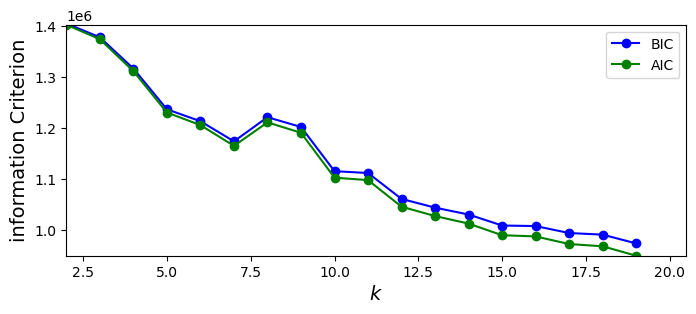

In [115]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(data_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(data_df) for model in gms_per_k]
aics = [model.aic(data_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])
# plt.annotate('Minimum',
#              xy=(7, bics[6]),
#              xytext=(0.35, 0.6),
#              textcoords='figure fraction',
#              fontsize = 14,
#              arrowprops=dict(facecolor = "black", shrink= 0.1)
#              )
plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

In [116]:
# 클러스터 개수와 covariance_type 하이퍼파라미터의 최적 조합을 찾기
min_bic = np.infty

for k in range(2, 20):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(data_df).bic(data_df)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type
print(best_k)
print(best_covariance_type)

ValueError: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.

In [76]:
# 클래스 4개
from sklearn.mixture import GaussianMixture

gmm_4 = GaussianMixture(n_components=4, random_state=42).fit(data_df)
gmm_cluster_labels = gmm_4.predict(data_df)

bus_on_df['gmm_cluster'] = gmm_cluster_labels

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_82330/3343529376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_on_df['gmm_cluster'] = gmm_cluster_labels


academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0          185                 8         0            1495           0   
1          170                11         0            1544           0   
2          179                10         0            1539           0   
3          188                 4         0            1498           0   
4          178                10         0            1521           0   

   university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  culture_cnt  \
0               0           5        16       406            62           68   
1               0           1        16       436            73           89   
2               0           2        17       441            70           89   
3               0           4        17       388            58           55   
4               0           2        16       444            73           84   

   univ_hospital_cnt  public_office_cnt  employee_cnt  alone_ratio  \
0                  0                 10          4091     0.401961   
1                  0                 13          4091     0.401961   
2                  0                 12          4091     0.401961   
3                  0                  8          4091     0.401961   
4                  0                 11          4091     0.401961   

   emp_corp_ratio  population_15to64  RIDE_SUM_6_10  gmm_cluster  
0        6.382215                149          84743            3  
1        6.382215                149         153539            3  
2        6.382215                149         397559            3  
3        6.382215                149          61645            3  
4        6.382215                149          61645            3

In [77]:
# DF에 좌표 및 node_id 합치기
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
total = pd.concat([bus_on_df,좌표],axis=1)

# 좌표 스케일링을 위한 형식 변환
total["X좌표"]=total["X좌표"].astype("float64")
total["Y좌표"]=total["Y좌표"].astype("float64")

# 산점도를 위한 좌표 스케일링
total["X좌표"] = (total["X좌표"]-126)*100
total["Y좌표"] = (total["Y좌표"]-36)*100

# 다람쥐 버스 클래스 5로 지정
total.loc[total["NODE_ID"].isin(NODE_ID_list),"gmm_cluster"]=5

# 클래스를 기준으로 정렬
total_다람쥐 = total.sort_values(by="gmm_cluster")


/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


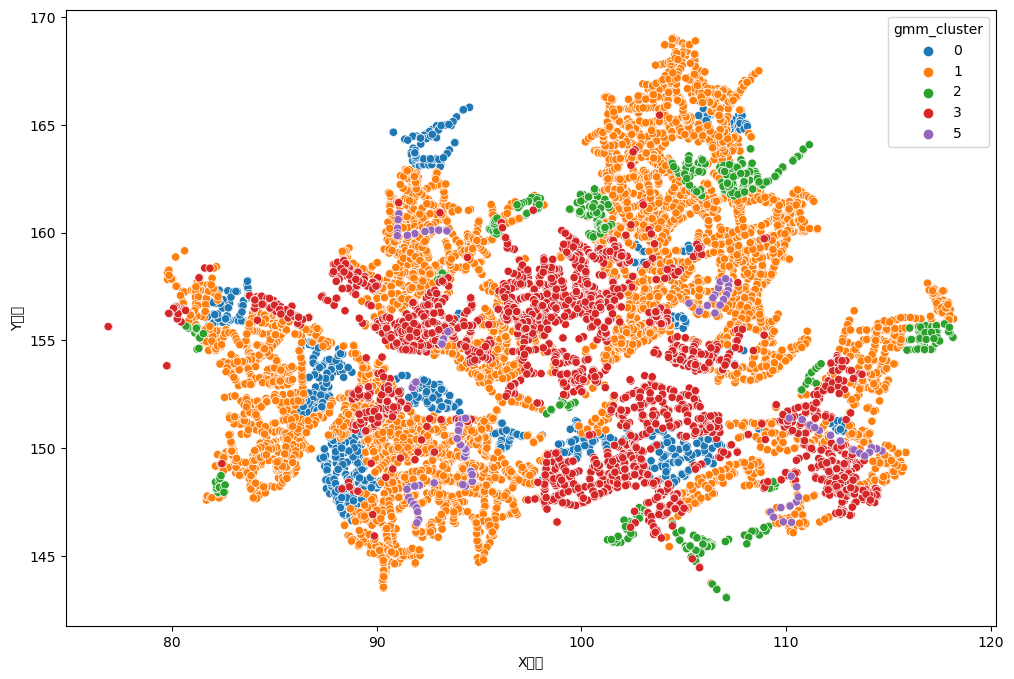

In [78]:

# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

In [85]:
# GMM 군집화 시각화 함수
def gmm_visualization(class_num,data_df):
    # 클래스 4개
    from sklearn.mixture import GaussianMixture

    gmm = GaussianMixture(n_components=class_num, n_init=10, random_state=42).fit(data_df)
    gmm_cluster_labels = gmm.predict(data_df)

    bus_on_df['gmm_cluster'] = gmm_cluster_labels

    # DF에 좌표 및 node_id 합치기
    좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
    total = pd.concat([bus_on_df,좌표],axis=1)

    # 좌표 스케일링을 위한 형식 변환
    total["X좌표"]=total["X좌표"].astype("float64")
    total["Y좌표"]=total["Y좌표"].astype("float64")

    # 산점도를 위한 좌표 스케일링
    total["X좌표"] = (total["X좌표"]-126)*100
    total["Y좌표"] = (total["Y좌표"]-36)*100

    # 다람쥐 버스 클래스 5로 지정
    total.loc[total["NODE_ID"].isin(NODE_ID_list),"gmm_cluster"]=class_num+2

    # 클래스를 기준으로 정렬
    total_다람쥐 = total.sort_values(by="gmm_cluster")

    # 좌표를 바탕으로 군집 시각화
    import seaborn as sns

    plt.figure(figsize=(12,8))
    
    plt.rcParams['font.family'] = 'AppleGothic'

    sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_다람쥐, palette='tab10')

    plt.show()
    
    print(gmm.converged_)
    print(gmm.n_iter_)


In [103]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12548 entries, 0 to 12547
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   academy_cnt        12548 non-null  int64  
 1   kindergarten_cnt   12548 non-null  int64  
 2   mart_cnt           12548 non-null  int64  
 3   restaurant_cnt     12548 non-null  int64  
 4   school_cnt         12548 non-null  int64  
 5   university_cnt     12548 non-null  int64  
 6   subway_cnt         12548 non-null  int64  
 7   tour_cnt           12548 non-null  int64  
 8   cafe_cnt           12548 non-null  int64  
 9   hospital_cnt       12548 non-null  int64  
 10  culture_cnt        12548 non-null  int64  
 11  univ_hospital_cnt  12548 non-null  int64  
 12  public_office_cnt  12548 non-null  int64  
 13  employee_cnt       12548 non-null  int64  
 14  alone_ratio        12548 non-null  float64
 15  emp_corp_ratio     12548 non-null  float64
 16  population_15to64  125

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_82330/730622380.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_on_df['gmm_cluster'] = gmm_cluster_labels
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


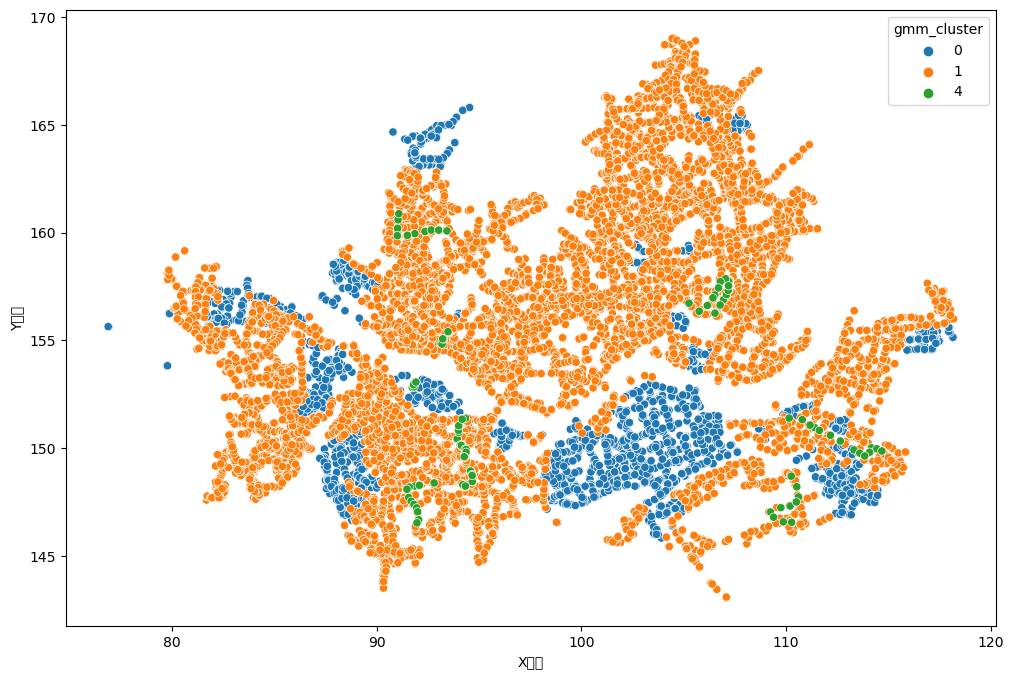

True
16


In [120]:
gmm_visualization(2,data_df)

In [118]:
# Bayesian 군집화 시각화 함수
def bgm_visualization(class_num,data_df):
    # 클래스 4개
    from sklearn.mixture import BayesianGaussianMixture

    bgm = BayesianGaussianMixture(n_components=class_num, n_init=10, random_state=42).fit(data_df)
    bgm_cluster_labels = bgm.predict(data_df)

    bus_on_df['bgm_cluster'] = bgm_cluster_labels

    # DF에 좌표 및 node_id 합치기
    좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
    total = pd.concat([bus_on_df,좌표],axis=1)

    # 좌표 스케일링을 위한 형식 변환
    total["X좌표"]=total["X좌표"].astype("float64")
    total["Y좌표"]=total["Y좌표"].astype("float64")

    # 산점도를 위한 좌표 스케일링
    total["X좌표"] = (total["X좌표"]-126)*100
    total["Y좌표"] = (total["Y좌표"]-36)*100

    # 다람쥐 버스 클래스 지정
    total.loc[total["NODE_ID"].isin(NODE_ID_list),"bgm_cluster"]=class_num+2

    # 클래스를 기준으로 정렬
    total_다람쥐 = total.sort_values(by="bgm_cluster")

    # 좌표를 바탕으로 군집 시각화
    import seaborn as sns

    plt.figure(figsize=(12,8))

    sns.scatterplot(x="X좌표",y="Y좌표",hue="bgm_cluster",data=total_다람쥐, palette='tab20')

    plt.show()
    
    print(np.round(bgm.weights_,2))


/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_82330/168333278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_on_df['bgm_cluster'] = bgm_cluster_labels
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


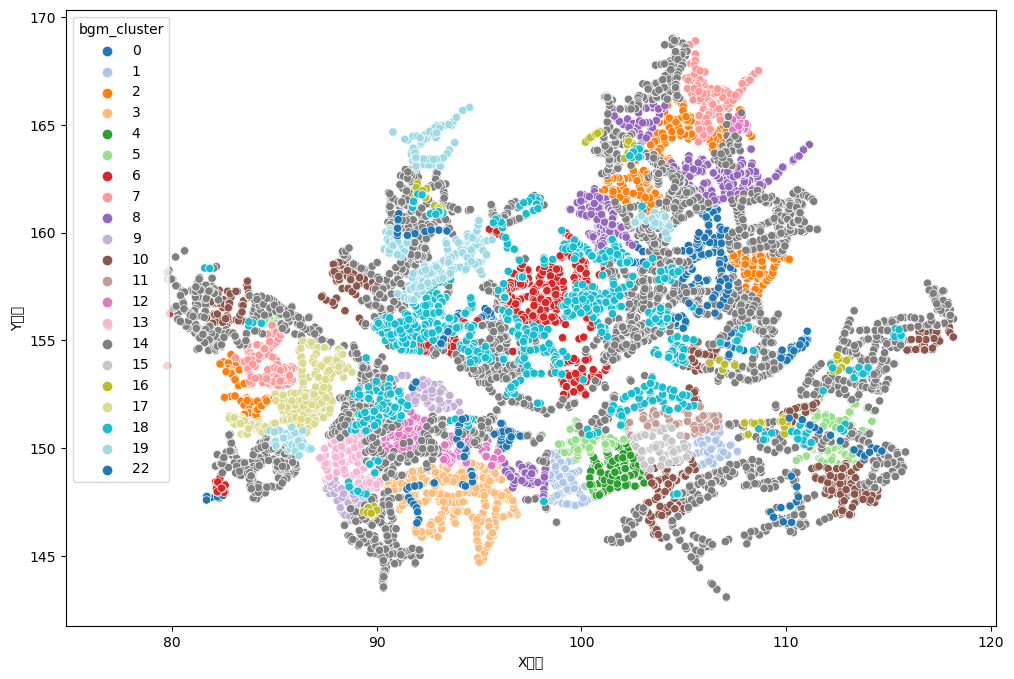

[0.03 0.02 0.05 0.04 0.02 0.02 0.05 0.03 0.05 0.02 0.05 0.01 0.03 0.01
 0.39 0.01 0.01 0.03 0.11 0.04]


In [119]:
bgm_visualization(20,data_df)

### 전체 피처를 클러스터링 해본 결과 다람쥐버스 주변 클래스 구분이 힘든 것을 느낌
- PCA 진행
- 승하차인원수 데이터를 제외한 피쳐 데이터

In [125]:
# For 반복문으로 고윳값과 기여율 확인하기
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

df = pd.DataFrame()

standard_scaler = StandardScaler()
standard_df = standard_scaler.fit_transform(data_df)

minmax_scaler = MinMaxScaler() 
minmax_df = minmax_scaler.fit_transform(data_df) 

robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(data_df)



In [123]:
len(data_df.columns)

17

###  적합한 n_components의 개수 찾기

In [321]:
data_df

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0              185                 8         0            1495           0   
1              170                11         0            1544           0   
2              179                10         0            1539           0   
3              188                 4         0            1498           0   
4              178                10         0            1521           0   
...            ...               ...       ...             ...         ...   
12543           72                20         0             238           2   
12544           92                27         0             368           1   
12545           41                19         2             224           4   
12546           85                25         0             325           2   
12547           98                19         4             314           5   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  \
0                   0           5        16       406            62   
1                   0           1        16       436            73   
2                   0           2        17       441            70   
3                   0           4        17       388            58   
4                   0           2        16       444            73   
...               ...         ...       ...       ...           ...   
12543               0           1         0        31            54   
12544               0           1         0        66            63   
12545               0           0         0        40            16   
12546               0           1         0        53            61   
12547               0           1         1        45            67   

       culture_cnt  univ_hospital_cnt  public_office_cnt  employee_cnt  \
0               68                  0                 10          4091   
1               89                  0                 13          4091   
2               89                  0                 12          4091   
3               55                  0                  8          4091   
4               84                  0                 11          4091   
...            ...                ...                ...           ...   
12543            0                  0                  4         12152   
12544            0                  0                  4         12152   
12545            0                  0                  3         12152   
12546            0                  0                  4         12152   
12547            0                  0                  4         12152   

       alone_ratio  emp_corp_ratio  population_15to64  
0         0.401961        6.382215                149  
1         0.401961        6.382215                149  
2         0.401961        6.382215                149  
3         0.401961        6.382215                149  
4         0.401961        6.382215                149  
...            ...             ...                ...  
12543     0.102713        2.801937              47206  
12544     0.102713        2.801937              47206  
12545     0.102713        2.801937              47206  
12546     0.102713        2.801937              47206  
12547     0.102713        2.801937              47206  

[12548 rows x 17 columns]

In [320]:
# 처음에는 DF의 피처 개수만큼 넣어서 기여율을 확인하다. 그 후의 적합한 component의 개수를 생각
pca = PCA(n_components = 17)
pca_array = pca.fit_transform(data_df)
pca_df = pd.DataFrame(pca_array,columns=[f'pca{num+1}' for num in range(data_df.shape[1])])
pca_df.head()

pca1          pca2         pca3       pca4       pca5       pca6  \
0 -54162.859123  12175.674115  1278.097335   2.239362  71.164762 -72.784249   
1 -54162.849322  12175.760744  1332.987026 -14.945647  81.698503 -52.491388   
2 -54162.849167  12175.756997  1329.920878  -6.484594  89.290926 -53.031397   
3 -54162.857024  12175.667029  1275.945133   3.663507  57.496905 -88.279006   
4 -54162.853860  12175.734000  1313.525174  -4.447372  91.659554 -45.637229   

        pca7      pca8      pca9     pca10     pca11     pca12     pca13  \
0  26.187060 -1.089538 -1.878504  4.302975  5.823857  2.852756 -0.252073   
1  41.150970  5.721168 -1.425166  2.290194  5.255719  2.057615 -1.745057   
2  40.281547  4.447800 -2.064693  3.060506  5.852796  2.598560 -1.334040   
3  17.859238 -7.375124 -2.390045  6.120243  6.412911  3.995764 -0.616007   
4  34.280653  4.038613 -2.550247  2.875478  5.462615  2.218916 -1.323097   

      pca14     pca15     pca16     pca17  
0  2.423169  0.079127 -0.025553  0.013993  
1 -1.221028  0.108681  0.033582  0.029280  
2 -0.285880  0.089593  0.027960  0.018940  
3  1.317197  0.158509 -0.060347  0.018739  
4 -0.256362  0.069068  0.024476  0.021513

In [322]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f'pca{num+1}' for num in range(data_df.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)           기여율     누적기여율
pca1       2.423595e+09  6.656463e-01  0.665646
pca2       1.217310e+09  3.343373e-01  0.999984
pca3       5.533029e+04  1.519660e-05  0.999999
pca4       3.049187e+03  8.374665e-07  1.000000
pca5       9.012242e+02  2.475234e-07  1.000000
pca6       5.697755e+02  1.564902e-07  1.000000
pca7       8.016237e+01  2.201679e-08  1.000000
pca8       3.847975e+01  1.056856e-08  1.000000
pca9       7.395039e+00  2.031065e-09  1.000000
pca10      3.535350e+00  9.709923e-10  1.000000
pca11      3.118628e+00  8.565388e-10  1.000000
pca12      2.807391e+00  7.710567e-10  1.000000
pca13      8.467356e-01  2.325580e-10  1.000000
pca14      5.929535e-01  1.628561e-10  1.000000
pca15      2.993035e-01  8.220442e-11  1.000000
pca16      5.800597e-02  1.593148e-11  1.000000
pca17      3.880604e-03  1.065817e-12  1.000000

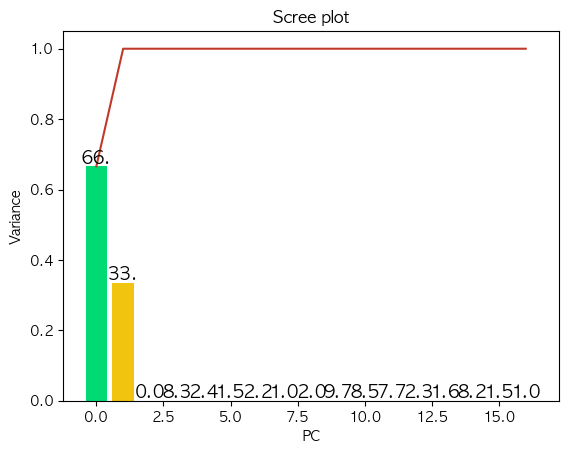

In [129]:
# scree plot

def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_ 
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(ind, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(num_components): #라벨링(바 위에 텍스트(annotation) 쓰기)
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.title('Scree plot')
    
scree_plot(pca)

# 누적이 0.8이상인 부분까지

### PCA 진행

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


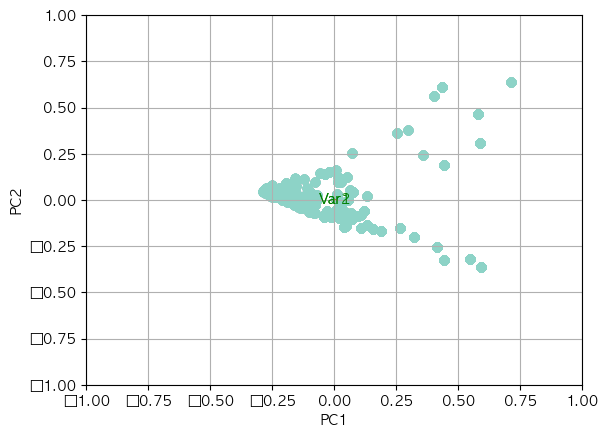

In [323]:
# 4차원 데이터를 2차원으로 축소
# n_components : 축소할 차원. 주성분 개수. 분산이 가장 큰 벡터의 개수
# from pca import pca # biplot을 그리기 위한 별도 라이브러리

pca_2 = PCA(n_components=2)
pca_array = pca_2.fit_transform(data_df)
pca_2_df = pd.DataFrame(pca_array,
                      columns=['pca1','pca2'])
pca_2_df.head()

# Biplot 시각화 
def biplot(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()
  
biplot(pca_array, pca_2.components_, 1, 2)

In [134]:
pca_1 = pca_2_df[['pca1']]
pca_1 = pca_1.sort_values(by='pca1', ascending=False)
pca_1 = pca_1.reset_index()
pca_1.index = pca_1.index+1
pca_1.index.name = "Ranking"
pca_1 = pca_1.rename(columns={'index':"station_name"})
pca_1

station_name           pca1
Ranking                             
1                 866  138899.903368
2                 819  138899.892284
3                 849  138899.886920
4                 822  138899.883767
5                 865  138899.866950
...               ...            ...
12544             409  -56502.776665
12545             405  -56502.779133
12546             410  -56502.779890
12547             404  -56502.783651
12548             407  -56502.785266

[12548 rows x 2 columns]

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


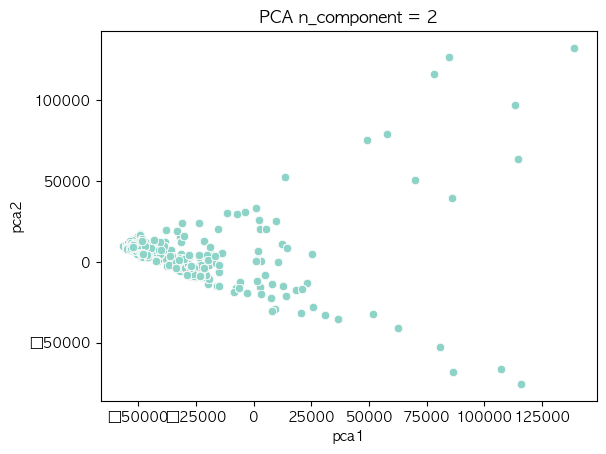

In [324]:
# 2차원 시각화
plt.rcParams['font.family'] = 'AppleGothic'

sns.scatterplot(
    x="pca1",
    y="pca2",
    palette='muted',
    data= pca_2_df
)

plt.title("PCA n_component = 2")
plt.show()

# PCA df를 바탕으로 클러스터링 진행

In [138]:
pca_2_df

pca1          pca2
0     -54162.859123  12175.674115
1     -54162.849322  12175.760744
2     -54162.849167  12175.756997
3     -54162.857024  12175.667029
4     -54162.853860  12175.734000
...             ...           ...
12543 -15035.290710 -15182.187499
12544 -15035.249233 -15181.984141
12545 -15035.308467 -15182.213797
12546 -15035.262842 -15182.052049
12547 -15035.261583 -15182.068612

[12548 rows x 2 columns]

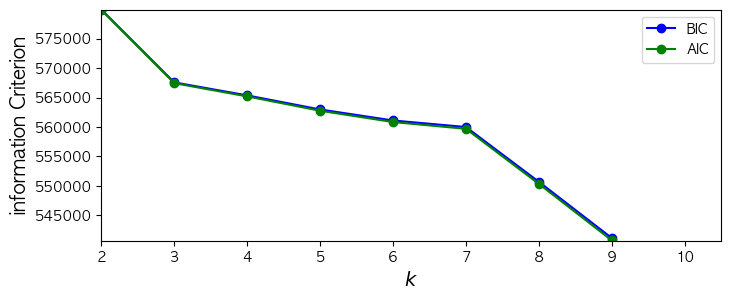

In [325]:
# component 개수 찾기
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(pca_2_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(pca_2_df) for model in gms_per_k]
aics = [model.aic(pca_2_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])
# plt.annotate('Minimum',
#              xy=(7, bics[6]),
#              xytext=(0.35, 0.6),
#              textcoords='figure fraction',
#              fontsize = 14,
#              arrowprops=dict(facecolor = "black", shrink= 0.1)
#              )
plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

In [331]:
# 클래스 9개
from sklearn.mixture import GaussianMixture

gmm_9 = GaussianMixture(n_components=9, random_state=42).fit(pca_2_df)
gmm_cluster_labels = gmm_9.predict(pca_2_df)

data_df['gmm_cluster'] = gmm_cluster_labels
pca_2_df['gmm_cluster'] = gmm_cluster_labels

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_82330/564750316.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['gmm_cluster'] = gmm_cluster_labels


In [332]:
data_df

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0              185                 8         0            1495           0   
1              170                11         0            1544           0   
2              179                10         0            1539           0   
3              188                 4         0            1498           0   
4              178                10         0            1521           0   
...            ...               ...       ...             ...         ...   
12543           72                20         0             238           2   
12544           92                27         0             368           1   
12545           41                19         2             224           4   
12546           85                25         0             325           2   
12547           98                19         4             314           5   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  \
0                   0           5        16       406            62   
1                   0           1        16       436            73   
2                   0           2        17       441            70   
3                   0           4        17       388            58   
4                   0           2        16       444            73   
...               ...         ...       ...       ...           ...   
12543               0           1         0        31            54   
12544               0           1         0        66            63   
12545               0           0         0        40            16   
12546               0           1         0        53            61   
12547               0           1         1        45            67   

       culture_cnt  univ_hospital_cnt  public_office_cnt  employee_cnt  \
0               68                  0                 10          4091   
1               89                  0                 13          4091   
2               89                  0                 12          4091   
3               55                  0                  8          4091   
4               84                  0                 11          4091   
...            ...                ...                ...           ...   
12543            0                  0                  4         12152   
12544            0                  0                  4         12152   
12545            0                  0                  3         12152   
12546            0                  0                  4         12152   
12547            0                  0                  4         12152   

       alone_ratio  emp_corp_ratio  population_15to64  gmm_cluster  
0         0.401961        6.382215                149            4  
1         0.401961        6.382215                149            4  
2         0.401961        6.382215                149            4  
3         0.401961        6.382215                149            4  
4         0.401961        6.382215                149            4  
...            ...             ...                ...          ...  
12543     0.102713        2.801937              47206            3  
12544     0.102713        2.801937              47206            3  
12545     0.102713        2.801937              47206            3  
12546     0.102713        2.801937              47206            3  
12547     0.102713        2.801937              47206            3  

[12548 rows x 18 columns]

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


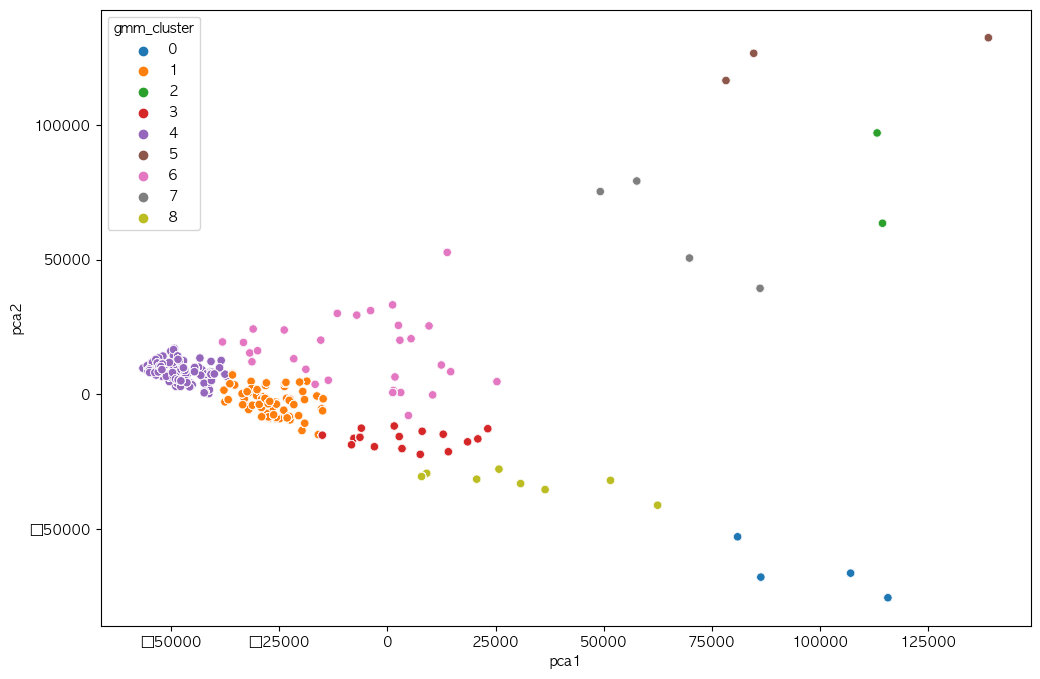

In [333]:
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="pca1",y="pca2",hue="gmm_cluster",data=pca_2_df, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

In [334]:
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID']]
total = pd.concat([data_df,좌표],axis=1)

 # 좌표 스케일링을 위한 형식 변환
total["X좌표"]=total["X좌표"].astype("float64")
total["Y좌표"]=total["Y좌표"].astype("float64")
    
total["X좌표"]=(total["X좌표"]-126)*100
total["Y좌표"]=(total["Y좌표"]-36)*100

# total.loc[total["NODE_ID"].isin(NODE_ID_list),"gmm_cluster"]=11+2

# 클래스를 기준으로 정렬
total_다람쥐 = total.sort_values(by="gmm_cluster")

total

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
0              185                 8         0            1495           0   
1              170                11         0            1544           0   
2              179                10         0            1539           0   
3              188                 4         0            1498           0   
4              178                10         0            1521           0   
...            ...               ...       ...             ...         ...   
12543           72                20         0             238           2   
12544           92                27         0             368           1   
12545           41                19         2             224           4   
12546           85                25         0             325           2   
12547           98                19         4             314           5   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
0                   0           5        16       406            62  ...   
1                   0           1        16       436            73  ...   
2                   0           2        17       441            70  ...   
3                   0           4        17       388            58  ...   
4                   0           2        16       444            73  ...   
...               ...         ...       ...       ...           ...  ...   
12543               0           1         0        31            54  ...   
12544               0           1         0        66            63  ...   
12545               0           0         0        40            16  ...   
12546               0           1         0        53            61  ...   
12547               0           1         1        45            67  ...   

       univ_hospital_cnt  public_office_cnt  employee_cnt  alone_ratio  \
0                      0                 10          4091     0.401961   
1                      0                 13          4091     0.401961   
2                      0                 12          4091     0.401961   
3                      0                  8          4091     0.401961   
4                      0                 11          4091     0.401961   
...                  ...                ...           ...          ...   
12543                  0                  4         12152     0.102713   
12544                  0                  4         12152     0.102713   
12545                  0                  3         12152     0.102713   
12546                  0                  4         12152     0.102713   
12547                  0                  4         12152     0.102713   

       emp_corp_ratio  population_15to64  gmm_cluster        X좌표         Y좌표  \
0            6.382215                149            4   98.77499  156.976513   
1            6.382215                149            4   98.55427  157.013868   
2            6.382215                149            4   98.62475  157.025720   
3            6.382215                149            4   98.89374  157.001124   
4            6.382215                149            4   98.64899  156.996233   
...               ...                ...          ...        ...         ...   
12543        2.801937              47206            3  112.88525  155.438763   
12544        2.801937              47206            3  112.76731  155.093057   
12545        2.801937              47206            3  113.77662  155.019474   
12546        2.801937              47206            3  112.85487  155.331842   
12547        2.801937              47206            3  114.00464  155.064261   

         NODE_ID  
0      100000001  
1      100000388  
2      100000389  
3      100000087  
4      100000090  
...          ...  
12543  124900078  
12544  124900079  
12545  124000268  
12546  124900108  
12547  124000333  

[12548 rows x 21 columns]

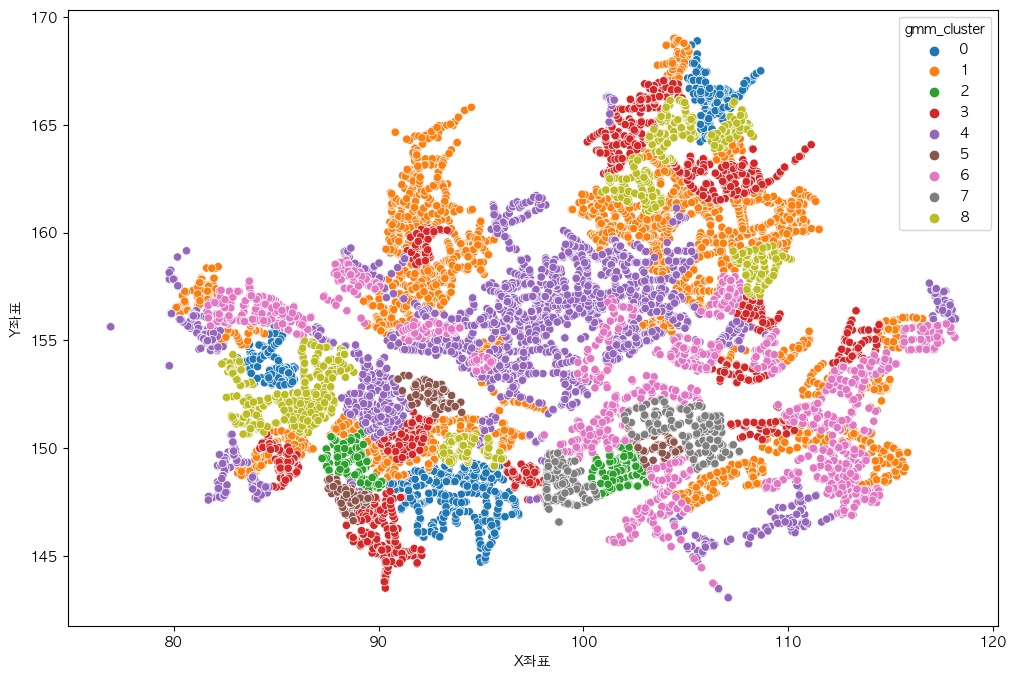

In [335]:
# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

In [336]:
# 다람쥐 버스 군집 확인
start_station = ["111000128","113000113","120000156","120000109","105000127","122000305","123000209"]
end_station = ["111000291","113000111", "120000007","120000018","105000072","122000302","123000043"]
다람쥐_start_class = []
for i in start_station:
    다람쥐_start_class.append(total_다람쥐.loc[total_다람쥐["NODE_ID"]==i,"gmm_cluster"].values[0])
    
다람쥐_end_class = []
for j in end_station:
    다람쥐_end_class.append(total_다람쥐.loc[total_다람쥐["NODE_ID"]==j,"gmm_cluster"].values[0])

print(set(다람쥐_start_class))
print(set(다람쥐_end_class))

{0, 1, 4, 6}
{0, 1, 3, 4, 6}


## 승하차 인원 피처를 넣은 데이터로 pca 진행

In [260]:
final_tb_infra_population.columns

Index(['NODE_ID', '정류소명', 'X좌표', 'Y좌표', '법정동코드', '법정동_구', '법정동', 'academy_cnt',
       'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt',
       'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64', 'RIDE_SUM_6_10',
       'ALIGHT_SUM_6_10'],
      dtype='object')

In [273]:
# 승차인원 피처를 넣은 데이터
data_df_on = final_tb_infra_population[['academy_cnt','kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt','university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64','RIDE_SUM_6_10']]

In [274]:
# 처음에는 DF의 피처 개수만큼 넣어서 기여율을 확인하다. 그 후의 적합한 component의 개수를 생각
pca = PCA(n_components = 18)
pca_array = pca.fit_transform(data_df_on)
pca_df = pd.DataFrame(pca_array,columns=[f'pca{num+1}' for num in range(data_df_on.shape[1])])
pca_df.head()

pca1          pca2          pca3         pca4       pca5  \
0   20572.888701 -55163.783277  12192.097707  1268.057913   3.251236   
1   89296.423491 -58320.734210  12223.878078  1299.187254 -15.220690   
2  333059.321175 -69518.490031  12336.292096  1211.739831 -11.586592   
3   -2500.775383 -54103.844343  12181.449583  1273.874408   5.105661   
4   -2500.763286 -54103.843117  12181.516592  1311.506282  -2.899858   

        pca6       pca7       pca8      pca9     pca10     pca11     pca12  \
0  69.829123 -72.833763  26.210397 -1.069893 -1.872960  4.290791  5.824882   
1  82.376895 -52.823025  41.054647  5.688747 -1.433714  2.301255  5.255020   
2  97.036030 -54.297383  39.764381  4.214443 -2.125638  3.154303  5.845393   
3  55.442792 -88.203348  17.929325 -7.336250 -2.379011  6.097452  6.414770   
4  89.692228 -45.651781  34.337231  4.077111 -2.540024  2.856714  5.464272   

      pca13     pca14     pca15     pca16     pca17     pca18  
0  2.848806 -0.252005  2.423989  0.076533 -0.025531  0.014344  
1  2.088584 -1.748947 -1.226195  0.117668  0.033497  0.027903  
2  2.787110 -1.358079 -0.313973  0.137731  0.027491  0.011267  
3  3.981084 -0.614192  1.319705  0.153363 -0.060298  0.019540  
4  2.196480 -1.320310 -0.253433  0.063755  0.024530  0.022396

In [275]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f'pca{num+1}' for num in range(data_df_on.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)           기여율     누적기여율
pca1       8.513978e+09  7.011955e-01  0.701195
pca2       2.410743e+09  1.985443e-01  0.899740
pca3       1.217309e+09  1.002553e-01  0.999995
pca4       5.431737e+04  4.473478e-06  1.000000
pca5       3.045908e+03  2.508553e-07  1.000000
pca6       8.942293e+02  7.364707e-08  1.000000
pca7       5.696611e+02  4.691623e-08  1.000000
pca8       8.013821e+01  6.600035e-09  1.000000
pca9       3.847426e+01  3.168669e-09  1.000000
pca10      7.394663e+00  6.090108e-10  1.000000
pca11      3.534393e+00  2.910861e-10  1.000000
pca12      3.118622e+00  2.568439e-10  1.000000
pca13      2.804109e+00  2.309412e-10  1.000000
pca14      8.466828e-01  6.973123e-11  1.000000
pca15      5.928828e-01  4.882873e-11  1.000000
pca16      2.990938e-01  2.463281e-11  1.000000
pca17      5.800595e-02  4.777263e-12  1.000000
pca18      3.875234e-03  3.191571e-13  1.000000

In [276]:
# n_components : 축소할 차원. 주성분 개수. 분산이 가장 큰 벡터의 개수

pca_2 = PCA(n_components=2)
pca_array = pca_2.fit_transform(data_df_on)
pca_2_df = pd.DataFrame(pca_array,
                      columns=['pca1','pca2'])
pca_2_df.head()

pca1          pca2
0   20572.888701 -55163.783277
1   89296.423491 -58320.734210
2  333059.321175 -69518.490031
3   -2500.775383 -54103.844343
4   -2500.763286 -54103.843117

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


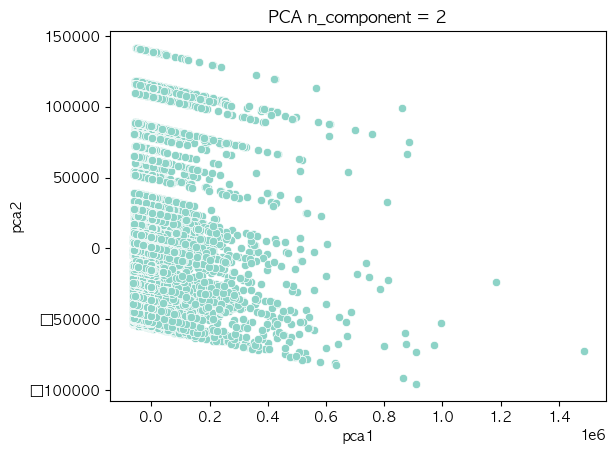

In [277]:
# 2차원 시각화
plt.rcParams['font.family'] = 'AppleGothic'

sns.scatterplot(
    x="pca1",
    y="pca2",
    palette='muted',
    data= pca_2_df
)

plt.title("PCA n_component = 2")
plt.show()

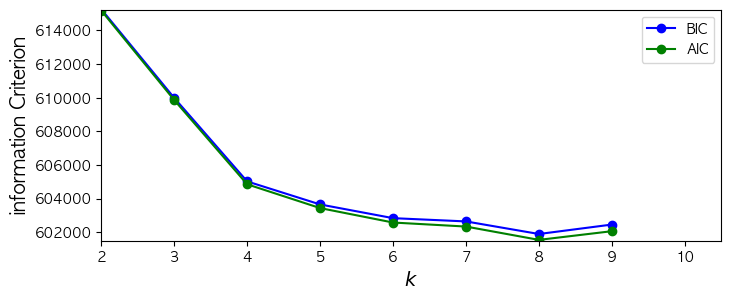

In [278]:
# component 개수 찾기
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(pca_2_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(pca_2_df) for model in gms_per_k]
aics = [model.aic(pca_2_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])
# plt.annotate('Minimum',
#              xy=(7, bics[6]),
#              xytext=(0.35, 0.6),
#              textcoords='figure fraction',
#              fontsize = 14,
#              arrowprops=dict(facecolor = "black", shrink= 0.1)
#              )
plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

In [279]:
# 클래스 8개
from sklearn.mixture import GaussianMixture

gmm_9 = GaussianMixture(n_components=8, random_state=42).fit(pca_2_df)
gmm_cluster_labels = gmm_9.predict(pca_2_df)

bus_on_df['gmm_cluster'] = gmm_cluster_labels
pca_2_df['gmm_cluster'] = gmm_cluster_labels

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_82330/1721233341.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_on_df['gmm_cluster'] = gmm_cluster_labels


/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


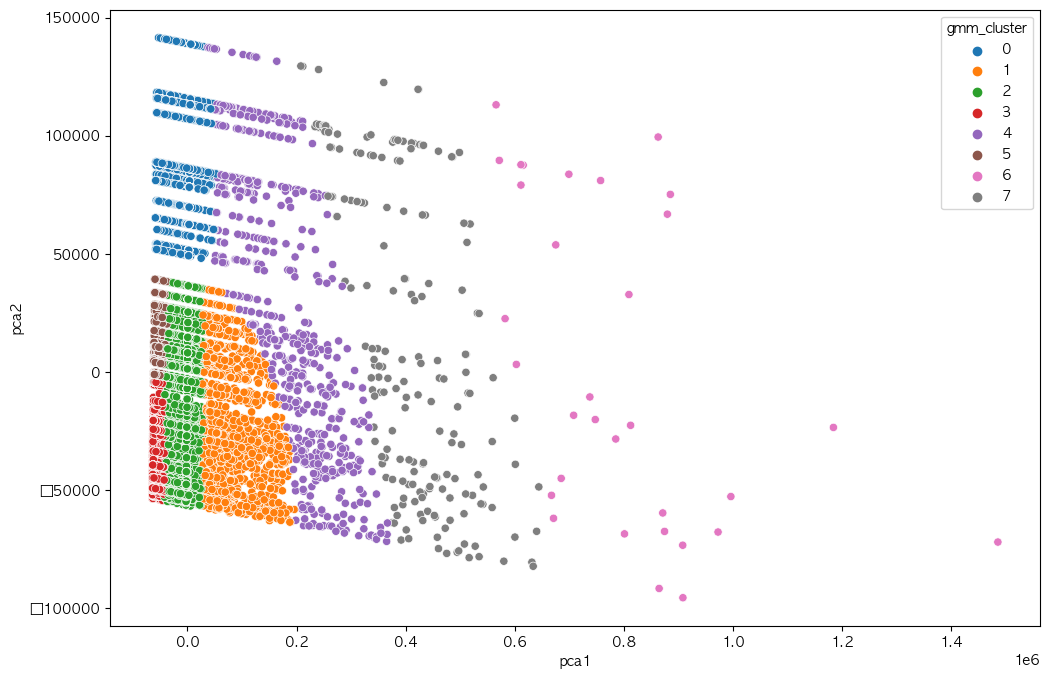

In [280]:
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="pca1",y="pca2",hue="gmm_cluster",data=pca_2_df, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

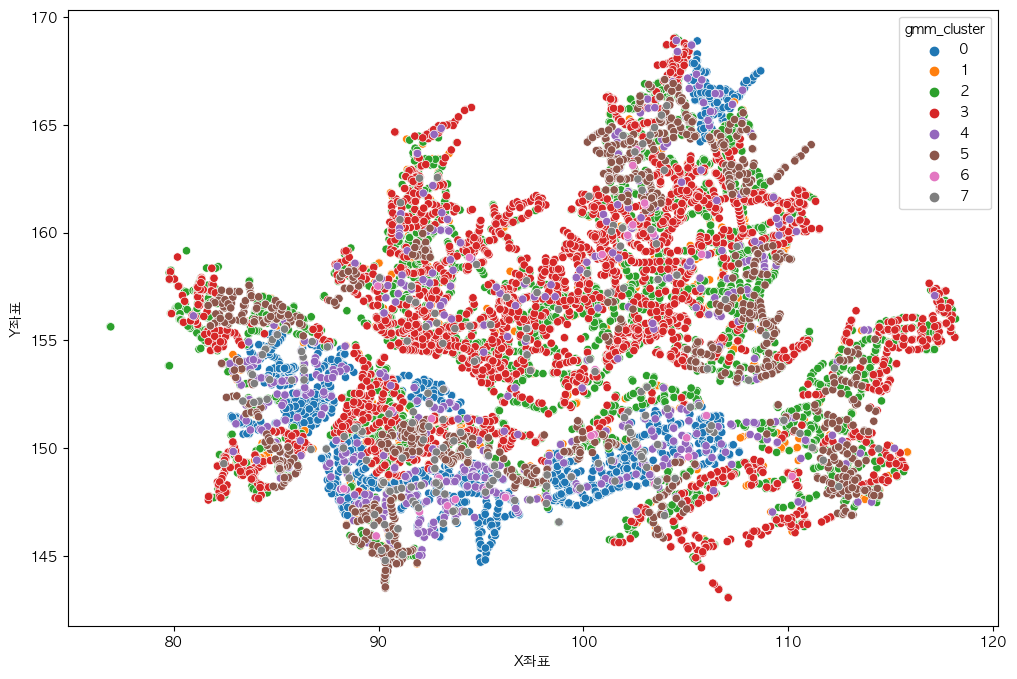

In [281]:
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID',"정류소명"]]
total = pd.concat([bus_on_df,좌표],axis=1)

 # 좌표 스케일링을 위한 형식 변환
total["X좌표"]=total["X좌표"].astype("float64")
total["Y좌표"]=total["Y좌표"].astype("float64")
    
total["X좌표"]=(total["X좌표"]-126)*100
total["Y좌표"]=(total["Y좌표"]-36)*100

# total.loc[total["NODE_ID"].isin(NODE_ID_list),"gmm_cluster"]=11+2

# 클래스를 기준으로 정렬
total_on_다람쥐 = total.sort_values(by="gmm_cluster")

# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_on_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

In [303]:
# 다람쥐 버스 군집 확인
start_on_station = ["111000128","113000113","120000156","120000109","105000127","122000305","123000209"]
end_on_station = ["111000291","113000111", "120000007","120000018","105000072","122000302","123000043"]
다람쥐_start_on_class = []
for i in start_on_station:
    다람쥐_start_on_class.append(total_on_다람쥐.loc[total_on_다람쥐["NODE_ID"]==i,"gmm_cluster"].values[0])
    
다람쥐_end_on_class = []
for j in end_on_station:
    다람쥐_end_on_class.append(total_on_다람쥐.loc[total_on_다람쥐["NODE_ID"]==j,"gmm_cluster"].values[0])

print(set(다람쥐_start_on_class))
print(set(다람쥐_end_on_class))

{0, 1, 4}
{1, 2, 4, 7}


In [282]:
total_on_다람쥐.loc[total_on_다람쥐["gmm_cluster"]==3,:]

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
9533          108                22         2             343           2   
164             2                 2         0              13           5   
9532          111                20         2             301           2   
9557           40                14         3             268           2   
9531           97                17         2             251           2   
...           ...               ...       ...             ...         ...   
3411           25                 6         0             164           3   
8299            6                12         0              21           1   
3156            4                 7         0              54           5   
8302           18                14         2              44           2   
3157            4                 8         0              56           5   

      university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
9533               0           1         0       103            77  ...   
164                0           0         3         9             3  ...   
9532               0           1         0       102            65  ...   
9557               0           0         1        39            18  ...   
9531               0           2         0        60            58  ...   
...              ...         ...       ...       ...           ...  ...   
3411               0           2         0        72            22  ...   
8299               1           0         0        13             1  ...   
3156               2           0         0        12             2  ...   
8302               1           0         6        15            10  ...   
3157               2           0         0        15             2  ...   

      alone_ratio  emp_corp_ratio  population_15to64  RIDE_SUM_6_10  \
9533     0.213094        6.856744               6775           6992   
164      0.121265        5.013514                808           3464   
9532     0.213094        6.856744               6775          21977   
9557     0.211309        2.165268              12781           7582   
9531     0.213094        6.856744               6775            332   
...           ...             ...                ...            ...   
3411     0.365391        5.961957               2720           8989   
8299     0.085205        3.750936              11170           7719   
3156     0.133735        3.934556              41186             35   
8302     0.085205        3.750936              11170          13850   
3157     0.133735        3.934556              41186           5250   

      bgm_cluster  gmm_cluster        X좌표         Y좌표    NODE_ID  \
9533           14            3   90.09081  153.017333  118900080   
164            14            3   97.25135  158.785196  100000010   
9532           14            3   90.25106  152.944737  118900075   
9557           14            3   91.00170  151.088808  118000274   
9531           14            3   90.47437  153.111633  118900071   
...           ...          ...        ...         ...        ...   
3411           18            3  102.35207  158.692379  107000220   
8299            0            3   81.69706  147.751580  116000649   
3156            8            3   99.91947  160.977735  107000294   
8302            6            3   82.41843  148.142875  116000628   
3157            8            3   99.95107  160.946143  107000295   

                  정류소명  
9533             효성아파트  
164              청운중학교  
9532      당산센트럴아이파크아파트  
9557             우신사거리  
9531           삼성래미안동문  
...                ...  
3411              안암초교  
8299  구로SKV1.제일풍경채포레스트  
3156  고려대사범대학부속고등학교.후문  
8302             푸른수목원  
3157  고려대사범대학부속고등학교.후문  

[3072 rows x 24 columns]

In [283]:
total_on_다람쥐.loc[total_on_다람쥐["gmm_cluster"]==4,:]

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
10872          102                 8         1             507           4   
10919          103                13         4             141           3   
481             11                 9         1             508           0   
483              9                 9         1             523           0   
6739            45                16         2             334           1   
...            ...               ...       ...             ...         ...   
2733           134                30         1             210           4   
3484            43                10         0             267           1   
8075            40                 8         1             643           1   
8874            37                18         0             259           2   
5554            29                14         0              66           5   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
10872               0           2         0       128            97  ...   
10919               1           1         0        27            47  ...   
481                 0           4         1       134            30  ...   
483                 0           4         2       134            32  ...   
6739                0           1         0        65            74  ...   
...               ...         ...       ...       ...           ...  ...   
2733                0           0         0        45            38  ...   
3484                0           1         1        57             7  ...   
8075                0           1         1       100            51  ...   
8874                1           1         1        57            22  ...   
5554                0           2         0        16             7  ...   

       alone_ratio  emp_corp_ratio  population_15to64  RIDE_SUM_6_10  \
10872     0.063873        9.300518              36585         250690   
10919     0.094116        5.632311              51715         254099   
481       0.215881        4.629741                277         355178   
483       0.215881        4.629741                277         262939   
6739      0.086301        3.902886             120593         115895   
...            ...             ...                ...            ...   
2733      0.080124        5.051220              40878         253608   
3484      0.166098        2.997031              72234         223810   
8075      0.189881        5.434933              83913         121932   
8874      0.288663        3.375476             182596         186239   
5554      0.115559        2.717852              35017         267513   

       bgm_cluster  gmm_cluster        X좌표         Y좌표    NODE_ID  \
10872           10            4  103.30970  148.665300  121000006   
10919            5            4  101.10399  150.790405  121000018   
481             18            4   97.27617  155.538770  101000005   
483             18            4   97.29706  155.561382  101000007   
6739            17            4   85.35197  152.101216  114000147   
...            ...          ...        ...         ...        ...   
2733            14            4  109.42822  160.663942  106000172   
3484            14            4  101.71141  163.650893  108000046   
8075            13            4   90.14704  148.461412  116900118   
8874             3            4   91.30753  148.683184  120000123   
5554            14            4   90.45265  157.544638  112000001   

                   정류소명  
10872             뱅뱅사거리  
10919               반포역  
481           서울역버스환승센터  
483    서울역버스환승센터.강우규의거터  
6739             신정네거리역  
...                 ...  
2733               중랑구청  
3484             우이초등학교  
8075           구로디지털단지역  
8874               신대방역  
5554            북가좌동삼거리  

[625 rows x 24 columns]

#### 하차인원

In [305]:
# 하차인원 피처를 넣은 데이터
data_df_off = final_tb_infra_population[['academy_cnt','kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt','university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64','ALIGHT_SUM_6_10']]

In [306]:
# 처음에는 DF의 피처 개수만큼 넣어서 기여율을 확인하다. 그 후의 적합한 component의 개수를 생각
pca = PCA(n_components = 18)
pca_array = pca.fit_transform(data_df_off)
pca_df = pd.DataFrame(pca_array,columns=[f'pca{num+1}' for num in range(data_df_off.shape[1])])
pca_df.head()

pca1          pca2          pca3         pca4       pca5  \
0   -9132.918421 -53986.221554 -12013.806682  1279.882987  -0.894907   
1  368761.123154 -65417.403338  -3314.042693  1144.279327 -11.391315   
2  613918.021497 -72833.329395   2329.941868  1017.680669   1.493937   
3   -1373.524673 -54220.938755 -11835.163693  1273.786436   0.705880   
4   -1373.504868 -54220.939066 -11835.226098  1311.438880  -7.569093   

        pca6       pca7       pca8      pca9     pca10     pca11     pca12  \
0  67.590482 -72.759150  26.606198 -1.642660 -1.839218  4.422908  5.808425   
1  86.543516 -52.566771  40.386327  6.433811 -1.484970  2.177350  5.260797   
2  99.742663 -53.173738  38.708503  6.041123 -2.190991  2.800181  5.868188   
3  54.102893 -88.252971  18.246160 -7.887679 -2.350656  6.252116  6.393883   
4  88.157023 -45.617521  34.685944  3.490065 -2.513282  2.984868  5.449788   

      pca13     pca14     pca15     pca16     pca17     pca18  
0  2.688676 -0.217856  2.466494  0.067096 -0.016946  0.014215  
1  2.251509 -1.815744 -1.302852  0.126959  0.020015  0.028928  
2  3.019602 -1.490981 -0.444050  0.124252  0.001352  0.018247  
3  3.813797 -0.577238  1.358046  0.147812 -0.052396  0.018945  
4  2.072524 -1.279575 -0.221962  0.060827  0.031127  0.021688

In [307]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f'pca{num+1}' for num in range(data_df_off.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)           기여율     누적기여율
pca1       1.321250e+10  7.847187e-01  0.784719
pca2       2.413676e+09  1.433534e-01  0.928072
pca3       1.211011e+09  7.192454e-02  0.999997
pca4       5.200853e+04  3.088899e-06  1.000000
pca5       3.045168e+03  1.808591e-07  1.000000
pca6       8.948796e+02  5.314883e-08  1.000000
pca7       5.697746e+02  3.384014e-08  1.000000
pca8       8.003466e+01  4.753431e-09  1.000000
pca9       3.832836e+01  2.276404e-09  1.000000
pca10      7.394167e+00  4.391555e-10  1.000000
pca11      3.530728e+00  2.096975e-10  1.000000
pca12      3.118600e+00  1.852204e-10  1.000000
pca13      2.796908e+00  1.661144e-10  1.000000
pca14      8.454346e-01  5.021219e-11  1.000000
pca15      5.917651e-01  3.514621e-11  1.000000
pca16      2.992446e-01  1.777278e-11  1.000000
pca17      5.797044e-02  3.442990e-12  1.000000
pca18      3.880580e-03  2.304760e-13  1.000000

In [308]:
# n_components : 축소할 차원. 주성분 개수. 분산이 가장 큰 벡터의 개수

pca_2 = PCA(n_components=2)
pca_array = pca_2.fit_transform(data_df_off)
pca_2_df = pd.DataFrame(pca_array,
                      columns=['pca1','pca2'])
pca_2_df.head()

pca1          pca2
0   -9132.918421 -53986.221554
1  368761.123154 -65417.403338
2  613918.021497 -72833.329395
3   -1373.524673 -54220.938755
4   -1373.504868 -54220.939066

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


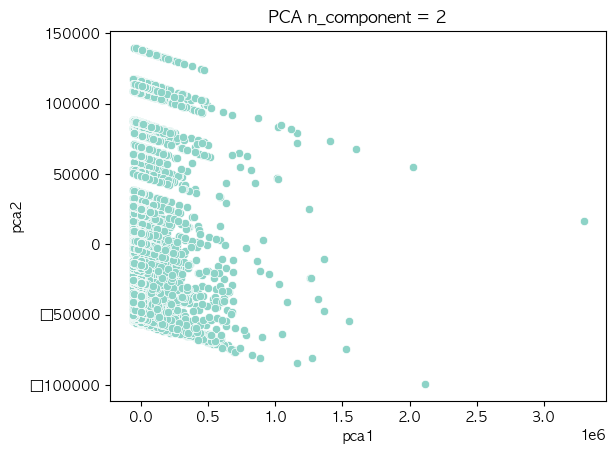

In [309]:
# 2차원 시각화
plt.rcParams['font.family'] = 'AppleGothic'

sns.scatterplot(
    x="pca1",
    y="pca2",
    palette='muted',
    data= pca_2_df
)

plt.title("PCA n_component = 2")
plt.show()

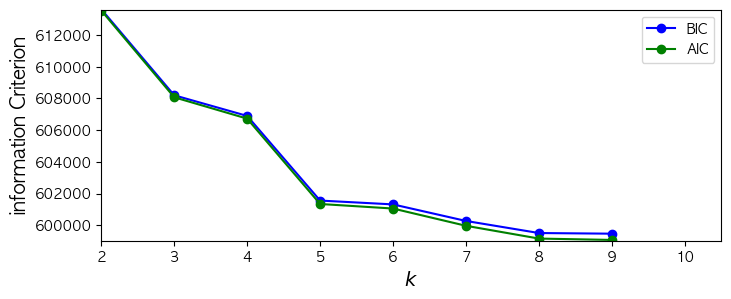

In [310]:
# component 개수 찾기
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(pca_2_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(pca_2_df) for model in gms_per_k]
aics = [model.aic(pca_2_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])
# plt.annotate('Minimum',
#              xy=(7, bics[6]),
#              xytext=(0.35, 0.6),
#              textcoords='figure fraction',
#              fontsize = 14,
#              arrowprops=dict(facecolor = "black", shrink= 0.1)
#              )
plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

In [311]:
# 클래스 8개
from sklearn.mixture import GaussianMixture

gmm_9 = GaussianMixture(n_components=8, random_state=42).fit(pca_2_df)
gmm_cluster_labels = gmm_9.predict(pca_2_df)

bus_on_df['gmm_cluster'] = gmm_cluster_labels
pca_2_df['gmm_cluster'] = gmm_cluster_labels

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_82330/1721233341.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_on_df['gmm_cluster'] = gmm_cluster_labels


/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


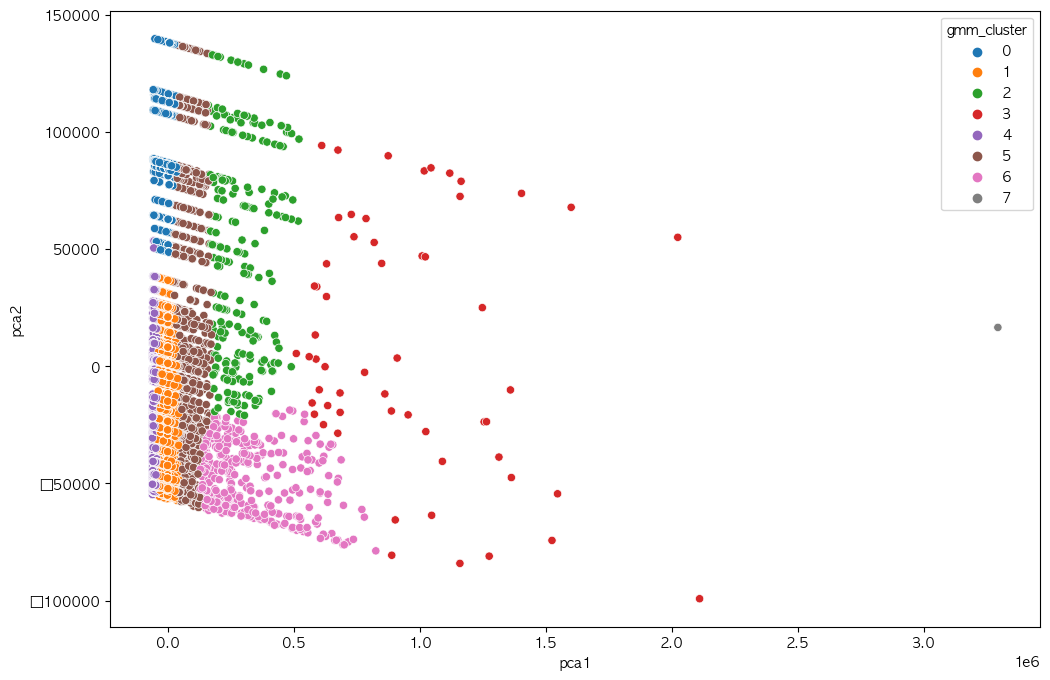

In [312]:
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="pca1",y="pca2",hue="gmm_cluster",data=pca_2_df, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

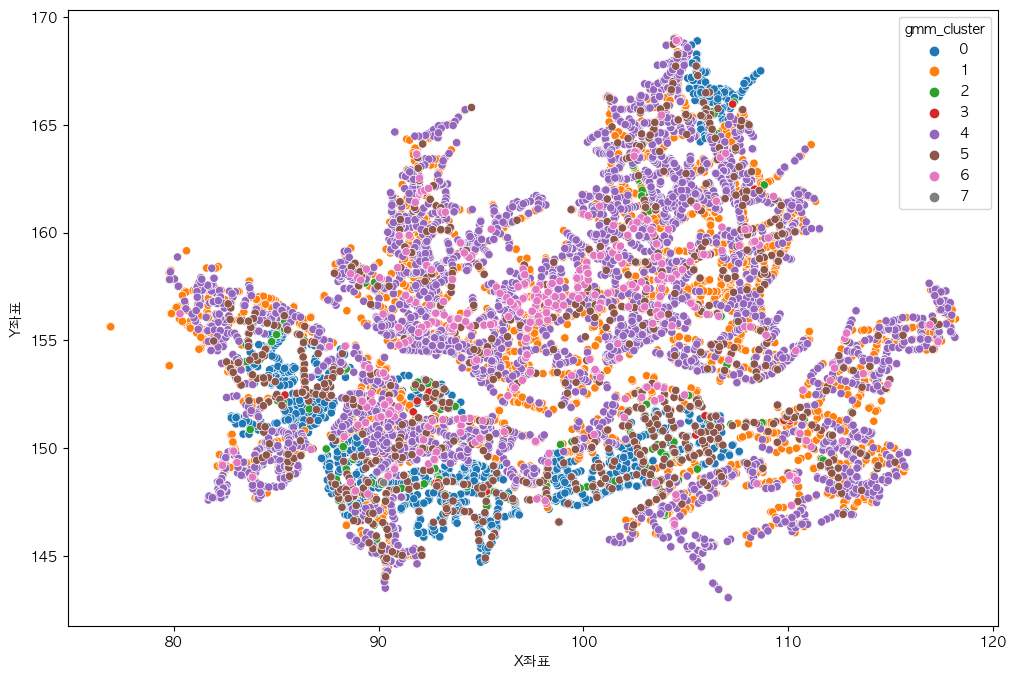

In [313]:
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID',"정류소명"]]
total = pd.concat([bus_on_df,좌표],axis=1)

 # 좌표 스케일링을 위한 형식 변환
total["X좌표"]=total["X좌표"].astype("float64")
total["Y좌표"]=total["Y좌표"].astype("float64")
    
total["X좌표"]=(total["X좌표"]-126)*100
total["Y좌표"]=(total["Y좌표"]-36)*100

# total.loc[total["NODE_ID"].isin(NODE_ID_list),"gmm_cluster"]=11+2

# 클래스를 기준으로 정렬
total_off_다람쥐 = total.sort_values(by="gmm_cluster")

# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_off_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

In [315]:
# 다람쥐 버스 군집 확인
start_off_station = ["111000128","113000113","120000156","120000109","105000127","122000305","123000209"]
end_off_station = ["111000291","113000111", "120000007","120000018","105000072","122000302","123000043"]
다람쥐_start_off_class = []
for i in start_off_station:
    다람쥐_start_off_class.append(total_off_다람쥐.loc[total_off_다람쥐["NODE_ID"]==i,"gmm_cluster"].values[0])
    
다람쥐_end_off_class = []
for j in end_off_station:
    다람쥐_end_off_class.append(total_off_다람쥐.loc[total_off_다람쥐["NODE_ID"]==j,"gmm_cluster"].values[0])

print(set(다람쥐_start_off_class))
print(set(다람쥐_end_off_class))

{0, 1, 5}
{1, 2, 3, 6}


In [193]:
total_off_다람쥐.loc[total_off_다람쥐["gmm_cluster"]==4,:]

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
9362            35                 9         0             164           4   
9355            62                17         2             241           4   
12168           36                 9         0              93           3   
9358            70                19         2             217           6   
9356            54                16         1             153           4   
...            ...               ...       ...             ...         ...   
7786            55                21         2             149           6   
4109            89                24         2              57           6   
7612            18                10         0             221           1   
2799            10                 7         0              18           0   
2792             2                 6         0               7           1   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
9362                0           1         1        23            11  ...   
9355                0           0         0        40            55  ...   
12168               0           0         1        19            10  ...   
9358                0           3         0        56            39  ...   
9356                0           0         1        31            30  ...   
...               ...         ...       ...       ...           ...  ...   
7786                0           0         0        36             8  ...   
4109                0           0         3        16            12  ...   
7612                0           1         0        28            19  ...   
2799                0           2         0         8             2  ...   
2792                0           0         2         5             1  ...   

       alone_ratio  emp_corp_ratio  population_15to64  RIDE_SUM_6_10  \
9362      0.167154        3.304223              68307           4616   
9355      0.167154        3.304223              68307          12415   
12168     0.212701        4.138869              23487         112363   
9358      0.167154        3.304223              68307           8002   
9356      0.167154        3.304223              68307          10375   
...            ...             ...                ...            ...   
7786      0.154118        5.422730              36057            318   
4109      0.104598        3.850492              51778          33518   
7612      0.108151        6.431472              12987          15449   
2799      0.080124        5.051220              40878         116391   
2792      0.080124        5.051220              40878         133846   

       bgm_cluster  gmm_cluster        X좌표         Y좌표    NODE_ID  \
9362            12            4   90.43332  149.993884  118000326   
9355            12            4   90.68253  150.591753  118000298   
12168           14            4  109.08501  149.922536  123000086   
9358            12            4   91.67702  149.855695  118000302   
9356            12            4   90.41530  150.478300  118000299   
...            ...          ...        ...         ...        ...   
7786            14            4   81.83981  157.297988  115900265   
4109            14            4  102.64128  165.751590  109900046   
7612            14            4   81.06190  155.896400  115000316   
2799            14            4  110.53926  161.540412  106000465   
2792            14            4  111.27216  161.580441  106000458   

                  정류소명  
9362            신길광장공원  
9355             코끼리유통  
12168       삼전동쌍용하이츠빌라  
9358           보라매공원입구  
9356              성락교회  
...                ...  
7786             프라임마트  
4109             청구아파트  
7612           공항동주민센터  
2799     신내우디안아파트107동앞  
2792   신내데시앙포레아파트220동앞  

[4373 rows x 24 columns]

In [194]:
total_off_다람쥐.loc[total_off_다람쥐["gmm_cluster"]==6,:]

academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  school_cnt  \
9085            35                11         1             387           1   
6126           114                17         1             715           2   
12291           20                 6         0              48           3   
9087            21                11         1             355           2   
9086            25                11         1             301           2   
...            ...               ...       ...             ...         ...   
2859           130                16         4             234           1   
9521            84                14         1             265           3   
6218            37                 5         1             371           0   
2856           115                13         3             282           3   
4987            55                19         1             255           3   

       university_cnt  subway_cnt  tour_cnt  cafe_cnt  hospital_cnt  ...  \
9085                0           2         1        95            18  ...   
6126                0           4         3       160           109  ...   
12291               0           1         3        13            16  ...   
9087                0           0         4        88            14  ...   
9086                0           0         3        80            24  ...   
...               ...         ...       ...       ...           ...  ...   
2859                1           1         1        51            46  ...   
9521                0           2         0        61            57  ...   
6218                0           2         2       124            21  ...   
2856                1           0         0        60            38  ...   
4987                0           1         0        41            25  ...   

       alone_ratio  emp_corp_ratio  population_15to64  RIDE_SUM_6_10  \
9085      0.093311        6.347889               3682          65176   
6126      0.146845        6.228625              16464         489808   
12291     0.093701        5.314796              18569          22344   
9087      0.093311        6.347889               3682         112560   
9086      0.093311        6.347889               3682         224409   
...            ...             ...                ...            ...   
2859      0.118736        3.806766              30882          74623   
9521      0.213094        6.856744               6775         350256   
6218      0.224617        3.127981              12718           7447   
2856      0.118736        3.806766              30882         195727   
4987      0.117887        3.585809              10509         131094   

       bgm_cluster  gmm_cluster        X좌표         Y좌표    NODE_ID  \
9085            18            6   89.37050  151.182800  118000001   
6126            18            6   94.79619  154.090036  113000001   
12291           14            6  114.86791  152.959797  124000445   
9087            18            6   89.97458  151.404034  118000004   
9086            18            6   90.11874  151.448389  118000003   
...            ...          ...        ...         ...        ...   
2859            19            6  102.62174  160.484766  107000152   
9521            14            6   90.33880  153.302200  118000089   
6218            18            6   90.99653  154.785379  113000508   
2856            19            6  103.15875  160.574473  107000059   
4987            14            6   90.93224  158.375461  111000274   

                             정류소명  
9085                     문래동남성아파트  
6126                          마포역  
12291                 중앙보훈병원역2번출구  
9087   남부지방법원등기국.구로세무서(에이스하이테크시티)  
9086   남부지방법원등기국.구로세무서(에이스하이테크시티)  
...                           ...  
2859                          길음역  
9521                  당산역삼성래미안아파트  
6218                      합정역(가상)  
2856                       성가복지병원  
4987                  증산역.증산동주민센터  

[375 rows x 24 columns]

# 승차인원과 재차인원 피처 사용하기

In [195]:
# 버스 재차 인원
Bus_Num_Passengers=call_dataframe("`Bus_Num_Passengers`")

컬럼명 :  ['기준_날짜', '노선_ID', '출발_정류장_ID', '도착_정류장_ID', '정류장_순서', '재차인원합_일', '재차인원합_6시', '재차인원합_7시', '재차인원합_8시', '재차인원합_9시', '재차인원합_10시']


In [200]:
Bus_Num_Passengers_230605 = Bus_Num_Passengers.loc[Bus_Num_Passengers["기준_날짜"]==20230605,:]

In [201]:
Bus_Num_Passengers_230605["재차인원합_6_10"]=Bus_Num_Passengers_230605.loc[:,"재차인원합_6시"]+ Bus_Num_Passengers_230605.loc[:,"재차인원합_7시"]+Bus_Num_Passengers_230605.loc[:,"재차인원합_8시"]+Bus_Num_Passengers_230605.loc[:,"재차인원합_9시"]

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_82330/3181694813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bus_Num_Passengers_230605["재차인원합_6_10"]=Bus_Num_Passengers_230605.loc[:,"재차인원합_6시"]+ Bus_Num_Passengers_230605.loc[:,"재차인원합_7시"]+Bus_Num_Passengers_230605.loc[:,"재차인원합_8시"]+Bus_Num_Passengers_230605.loc[:,"재차인원합_9시"]


In [202]:
Bus_Num_Passengers_230605

기준_날짜      노선_ID  출발_정류장_ID  도착_정류장_ID  정류장_순서  재차인원합_일  재차인원합_6시  \
0      20230605  100100001  100000004  101000001      23      706      10.0   
1      20230605  100100001  100000023  100000415      16     1654      17.0   
2      20230605  100100001  100000104  100000413      21      857       5.0   
3      20230605  100100001  100000413  100000004      22      873      10.0   
4      20230605  100100001  100000415  100000416      17     1453      15.0   
...         ...        ...        ...        ...     ...      ...       ...   
37787  20230605  124900003  124900124  124900122      56      581      51.0   
37788  20230605  124900003  124900127  124900129       2       53       1.0   
37789  20230605  124900003  124900128  124900111      76       78       7.0   
37790  20230605  124900003  124900129  124000459       3       83       6.0   
37791  20230605  124900003  124900130  124900128      75       87       8.0   

       재차인원합_7시  재차인원합_8시  재차인원합_9시  재차인원합_10시  재차인원합_6_10  
0          16.0      13.0      12.0       22.0        51.0  
1          94.0      93.0     281.0      182.0       485.0  
2          15.0      14.0      13.0       28.0        47.0  
3          16.0      17.0      17.0       28.0        60.0  
4          82.0      71.0     241.0      148.0       409.0  
...         ...       ...       ...        ...         ...  
37787      36.0      33.0      24.0       37.0       144.0  
37788       9.0       3.0       4.0        2.0        17.0  
37789       6.0       4.0       3.0        3.0        20.0  
37790      15.0       7.0       4.0        4.0        32.0  
37791       6.0       4.0       4.0        5.0        22.0  

[37792 rows x 12 columns]

In [207]:
data_df_on_passenger=data_df_on.copy()

In [223]:
data_df_on_passenger = final_tb_infra_population[['NODE_ID','academy_cnt','kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt','university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64','RIDE_SUM_6_10']]

In [224]:
data_df_on_passenger["NODE_ID"]=data_df_on_passenger["NODE_ID"].astype("int64")

/var/folders/dj/074406ws2d7f7vkzzjkhcfp80000gn/T/ipykernel_82330/687709107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_on_passenger["NODE_ID"]=data_df_on_passenger["NODE_ID"].astype("int64")


In [225]:
Bus_Num_Passengers_230605_group=Bus_Num_Passengers_230605.groupby(by="출발_정류장_ID").sum().reset_index()

In [240]:
Bus_Num_Passengers_230605_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12366 entries, 0 to 12365
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   출발_정류장_ID   12366 non-null  int64  
 1   기준_날짜       12366 non-null  int64  
 2   노선_ID       12366 non-null  int64  
 3   도착_정류장_ID   12366 non-null  int64  
 4   정류장_순서      12366 non-null  int64  
 5   재차인원합_일     12366 non-null  int64  
 6   재차인원합_6시    12366 non-null  float64
 7   재차인원합_7시    12366 non-null  float64
 8   재차인원합_8시    12366 non-null  float64
 9   재차인원합_9시    12366 non-null  float64
 10  재차인원합_10시   12366 non-null  float64
 11  재차인원합_6_10  12366 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 1.1 MB


In [254]:
bus_passenger_on = pd.merge(left=data_df_on_passenger,right=Bus_Num_Passengers_230605_group,left_on="NODE_ID",right_on="출발_정류장_ID",how="outer")
bus_passenger_on.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14479 entries, 0 to 14478
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NODE_ID            12548 non-null  float64
 1   academy_cnt        12548 non-null  float64
 2   kindergarten_cnt   12548 non-null  float64
 3   mart_cnt           12548 non-null  float64
 4   restaurant_cnt     12548 non-null  float64
 5   school_cnt         12548 non-null  float64
 6   university_cnt     12548 non-null  float64
 7   subway_cnt         12548 non-null  float64
 8   tour_cnt           12548 non-null  float64
 9   cafe_cnt           12548 non-null  float64
 10  hospital_cnt       12548 non-null  float64
 11  culture_cnt        12548 non-null  float64
 12  univ_hospital_cnt  12548 non-null  float64
 13  public_office_cnt  12548 non-null  float64
 14  employee_cnt       12548 non-null  float64
 15  alone_ratio        12548 non-null  float64
 16  emp_corp_ratio     125

In [255]:
bus_passenger_on=bus_passenger_on[['NODE_ID','academy_cnt', 'kindergarten_cnt', 'mart_cnt',
       'restaurant_cnt', 'school_cnt', 'university_cnt', 'subway_cnt',
       'tour_cnt', 'cafe_cnt', 'hospital_cnt', 'culture_cnt',
       'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt', 'alone_ratio',
       'emp_corp_ratio', 'population_15to64','RIDE_SUM_6_10', '재차인원합_6_10']]

In [259]:
bus_passenger_on

NODE_ID  academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  \
0      100000001.0        185.0               8.0       0.0          1495.0   
1      100000388.0        170.0              11.0       0.0          1544.0   
2      100000389.0        179.0              10.0       0.0          1539.0   
3      100000087.0        188.0               4.0       0.0          1498.0   
4      100000090.0        178.0              10.0       0.0          1521.0   
...            ...          ...               ...       ...             ...   
14474          NaN          NaN               NaN       NaN             NaN   
14475          NaN          NaN               NaN       NaN             NaN   
14476          NaN          NaN               NaN       NaN             NaN   
14477          NaN          NaN               NaN       NaN             NaN   
14478          NaN          NaN               NaN       NaN             NaN   

       school_cnt  university_cnt  subway_cnt  tour_cnt  cafe_cnt  \
0             0.0             0.0         5.0      16.0     406.0   
1             0.0             0.0         1.0      16.0     436.0   
2             0.0             0.0         2.0      17.0     441.0   
3             0.0             0.0         4.0      17.0     388.0   
4             0.0             0.0         2.0      16.0     444.0   
...           ...             ...         ...       ...       ...   
14474         NaN             NaN         NaN       NaN       NaN   
14475         NaN             NaN         NaN       NaN       NaN   
14476         NaN             NaN         NaN       NaN       NaN   
14477         NaN             NaN         NaN       NaN       NaN   
14478         NaN             NaN         NaN       NaN       NaN   

       hospital_cnt  culture_cnt  univ_hospital_cnt  public_office_cnt  \
0              62.0         68.0                0.0               10.0   
1              73.0         89.0                0.0               13.0   
2              70.0         89.0                0.0               12.0   
3              58.0         55.0                0.0                8.0   
4              73.0         84.0                0.0               11.0   
...             ...          ...                ...                ...   
14474           NaN          NaN                NaN                NaN   
14475           NaN          NaN                NaN                NaN   
14476           NaN          NaN                NaN                NaN   
14477           NaN          NaN                NaN                NaN   
14478           NaN          NaN                NaN                NaN   

       employee_cnt  alone_ratio  emp_corp_ratio  population_15to64  \
0            4091.0     0.401961        6.382215              149.0   
1            4091.0     0.401961        6.382215              149.0   
2            4091.0     0.401961        6.382215              149.0   
3            4091.0     0.401961        6.382215              149.0   
4            4091.0     0.401961        6.382215              149.0   
...             ...          ...             ...                ...   
14474           NaN          NaN             NaN                NaN   
14475           NaN          NaN             NaN                NaN   
14476           NaN          NaN             NaN                NaN   
14477           NaN          NaN             NaN                NaN   
14478           NaN          NaN             NaN                NaN   

       RIDE_SUM_6_10  재차인원합_6_10  
0            84743.0      1267.0  
1           153539.0      6756.0  
2           397559.0      8389.0  
3            61645.0         NaN  
4            61645.0         NaN  
...              ...         ...  
14474            NaN         1.0  
14475            NaN       144.0  
14476            NaN       443.0  
14477            NaN       143.0  
14478            NaN       445.0  

[14479 rows x 20 columns]

In [256]:
len(bus_passenger_on.columns)

20

In [257]:
bus_passenger_on.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14479 entries, 0 to 14478
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NODE_ID            12548 non-null  float64
 1   academy_cnt        12548 non-null  float64
 2   kindergarten_cnt   12548 non-null  float64
 3   mart_cnt           12548 non-null  float64
 4   restaurant_cnt     12548 non-null  float64
 5   school_cnt         12548 non-null  float64
 6   university_cnt     12548 non-null  float64
 7   subway_cnt         12548 non-null  float64
 8   tour_cnt           12548 non-null  float64
 9   cafe_cnt           12548 non-null  float64
 10  hospital_cnt       12548 non-null  float64
 11  culture_cnt        12548 non-null  float64
 12  univ_hospital_cnt  12548 non-null  float64
 13  public_office_cnt  12548 non-null  float64
 14  employee_cnt       12548 non-null  float64
 15  alone_ratio        12548 non-null  float64
 16  emp_corp_ratio     125

In [258]:
bus_passenger_on.loc[bus_passenger_on["재차인원합_6_10"].isna(),:]

NODE_ID  academy_cnt  kindergarten_cnt  mart_cnt  restaurant_cnt  \
3      100000087.0        188.0               4.0       0.0          1498.0   
4      100000090.0        178.0              10.0       0.0          1521.0   
5      100000091.0        174.0              13.0       0.0          1600.0   
6      100000096.0        170.0              11.0       0.0          1619.0   
7      100000097.0        180.0              10.0       0.0          1585.0   
...            ...          ...               ...       ...             ...   
12514  124000398.0         98.0              30.0       1.0           330.0   
12515  124000435.0        100.0              14.0       3.0           223.0   
12516  124000436.0        108.0              14.0       4.0           234.0   
12545  124000268.0         41.0              19.0       2.0           224.0   
12547  124000333.0         98.0              19.0       4.0           314.0   

       school_cnt  university_cnt  subway_cnt  tour_cnt  cafe_cnt  \
3             0.0             0.0         4.0      17.0     388.0   
4             0.0             0.0         2.0      16.0     444.0   
5             0.0             0.0         1.0      13.0     448.0   
6             0.0             0.0         1.0      15.0     469.0   
7             0.0             0.0         2.0      17.0     453.0   
...           ...             ...         ...       ...       ...   
12514         2.0             0.0         1.0       1.0      68.0   
12515         4.0             0.0         1.0       1.0      45.0   
12516         4.0             0.0         1.0       1.0      47.0   
12545         4.0             0.0         0.0       0.0      40.0   
12547         5.0             0.0         1.0       1.0      45.0   

       hospital_cnt  culture_cnt  univ_hospital_cnt  public_office_cnt  \
3              58.0         55.0                0.0                8.0   
4              73.0         84.0                0.0               11.0   
5              85.0         86.0                0.0               13.0   
6              88.0         91.0                0.0               13.0   
7              72.0         89.0                0.0               12.0   
...             ...          ...                ...                ...   
12514          36.0          3.0                0.0                1.0   
12515          66.0          0.0                0.0                4.0   
12516          65.0          0.0                0.0                4.0   
12545          16.0          0.0                0.0                3.0   
12547          67.0          0.0                0.0                4.0   

       employee_cnt  alone_ratio  emp_corp_ratio  population_15to64  \
3            4091.0     0.401961        6.382215              149.0   
4            4091.0     0.401961        6.382215              149.0   
5            4091.0     0.401961        6.382215              149.0   
6            4091.0     0.401961        6.382215              149.0   
7            4091.0     0.401961        6.382215              149.0   
...             ...          ...             ...                ...   
12514       12523.0     0.059752        3.497068            29747.0   
12515       12523.0     0.059752        3.497068            29747.0   
12516       12523.0     0.059752        3.497068            29747.0   
12545       12152.0     0.102713        2.801937            47206.0   
12547       12152.0     0.102713        2.801937            47206.0   

       RIDE_SUM_6_10  재차인원합_6_10  
3            61645.0         NaN  
4            61645.0         NaN  
5            61645.0         NaN  
6            61645.0         NaN  
7            61645.0         NaN  
...              ...         ...  
12514        61645.0         NaN  
12515        61645.0         NaN  
12516        61645.0         NaN  
12545        61645.0         NaN  
12547        61645.0         NaN  

[2113 rows x 20 columns]

In [248]:
# 처음에는 DF의 피처 개수만큼 넣어서 기여율을 확인하다. 그 후의 적합한 component의 개수를 생각
pca = PCA(n_components = 19)
pca_array = pca.fit_transform(bus_passenger_on)
pca_df = pd.DataFrame(pca_array,columns=[f'pca{num+1}' for num in range(bus_passenger_on.shape[1])])
pca_df.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [232]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
                       '기여율':pca.explained_variance_ratio_},
                      index=np.array([f'pca{num+1}' for num in range(bus_passenger_on.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

설명가능한 분산 비율(고윳값)           기여율     누적기여율
pca1       1.008935e+10  7.393754e-01  0.739375
pca2       2.399794e+09  1.758636e-01  0.915239
pca3       1.156004e+09  8.471520e-02  0.999954
pca4       5.711011e+05  4.185188e-05  0.999996
pca5       4.945082e+04  3.623894e-06  1.000000
pca6       3.049253e+03  2.234578e-07  1.000000
pca7       8.789519e+02  6.441205e-08  1.000000
pca8       5.100424e+02  3.737733e-08  1.000000
pca9       7.077006e+01  5.186227e-09  1.000000
pca10      3.774929e+01  2.766373e-09  1.000000
pca11      6.004671e+00  4.400391e-10  1.000000
pca12      3.439491e+00  2.520555e-10  1.000000
pca13      3.002292e+00  2.200164e-10  1.000000
pca14      2.472984e+00  1.812272e-10  1.000000
pca15      8.440859e-01  6.185697e-11  1.000000
pca16      5.644886e-01  4.136730e-11  1.000000
pca17      3.105307e-01  2.275655e-11  1.000000
pca18      5.376026e-02  3.939702e-12  1.000000
pca19      3.736768e-03  2.738408e-13  1.000000

In [233]:
# n_components : 축소할 차원. 주성분 개수. 분산이 가장 큰 벡터의 개수

pca_2 = PCA(n_components=2)
pca_array = pca_2.fit_transform(bus_passenger_on)
pca_2_df = pd.DataFrame(pca_array,
                      columns=['pca1','pca2'])
pca_2_df.head()

pca1          pca2
0   18938.508266 -55977.888687
1   87717.563563 -58751.642111
2  331544.979292 -68563.750112
3   15112.701870 -55822.662220
4  321809.472169 -65600.994159

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


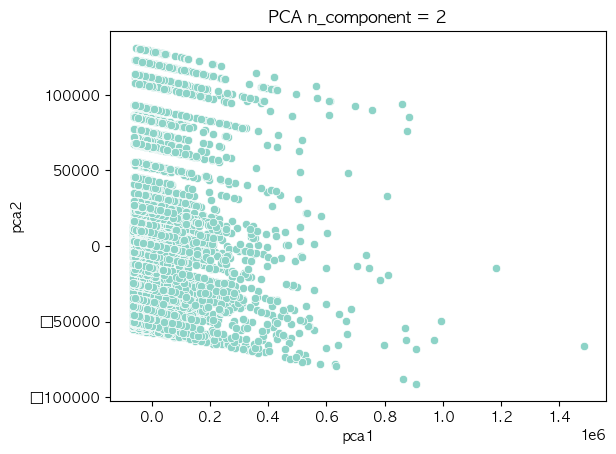

In [234]:
# 2차원 시각화
plt.rcParams['font.family'] = 'AppleGothic'

sns.scatterplot(
    x="pca1",
    y="pca2",
    palette='muted',
    data= pca_2_df
)

plt.title("PCA n_component = 2")
plt.show()

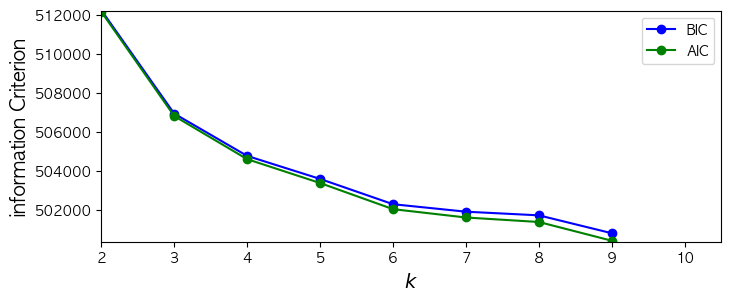

In [235]:
# component 개수 찾기
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(pca_2_df)
             for k in range(2, 10)]
# atrribute_error가 뜨면 범위를 1을 제외하고 입력할 것

bics = [model.bic(pca_2_df) for model in gms_per_k]
aics = [model.aic(pca_2_df) for model in gms_per_k]

plt.figure(figsize = (8,3))
plt.plot(range(2,10),bics, "bo-", label="BIC")
plt.plot(range(2,10),aics, "go-", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("information Criterion", fontsize=14)
plt.axis([2, 10.5, np.min(aics)-50, np.max(aics)+50])
# plt.annotate('Minimum',
#              xy=(7, bics[6]),
#              xytext=(0.35, 0.6),
#              textcoords='figure fraction',
#              fontsize = 14,
#              arrowprops=dict(facecolor = "black", shrink= 0.1)
#              )
plt.legend()

# 그림 저장
# save_fit("aic_bic_vs_k_plot")
plt.show()

In [237]:
from sklearn.mixture import GaussianMixture

gmm_9 = GaussianMixture(n_components=9, random_state=42).fit(pca_2_df)
gmm_cluster_labels = gmm_9.predict(pca_2_df)

# data 변경할 것
bus_passenger_on['gmm_cluster'] = gmm_cluster_labels
pca_2_df['gmm_cluster'] = gmm_cluster_labels

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


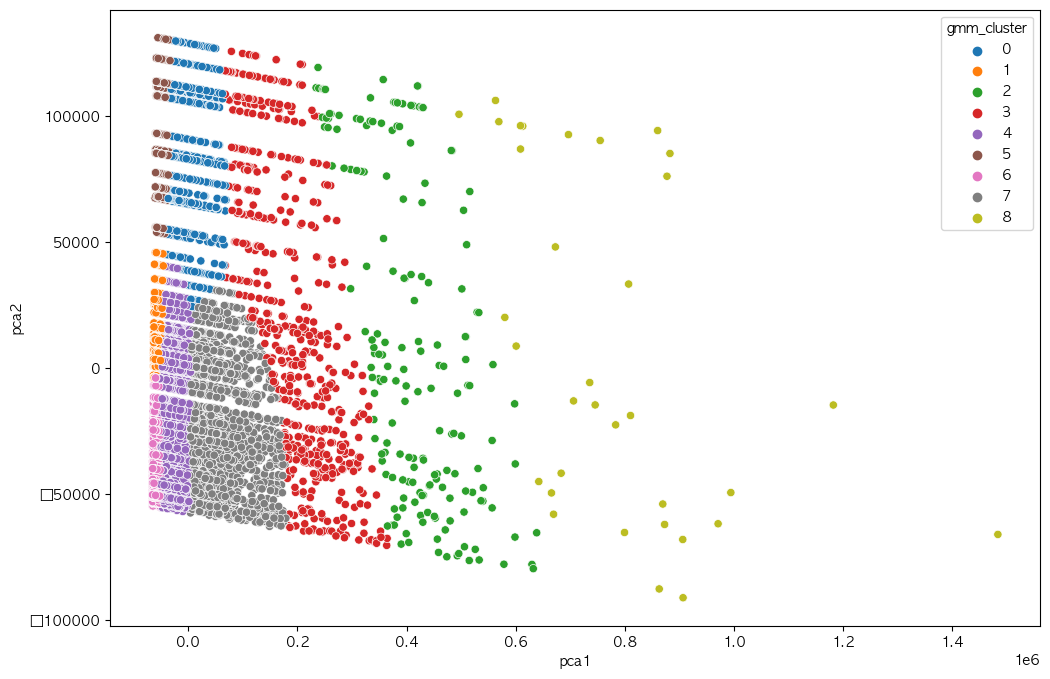

In [238]:
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="pca1",y="pca2",hue="gmm_cluster",data=pca_2_df, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()

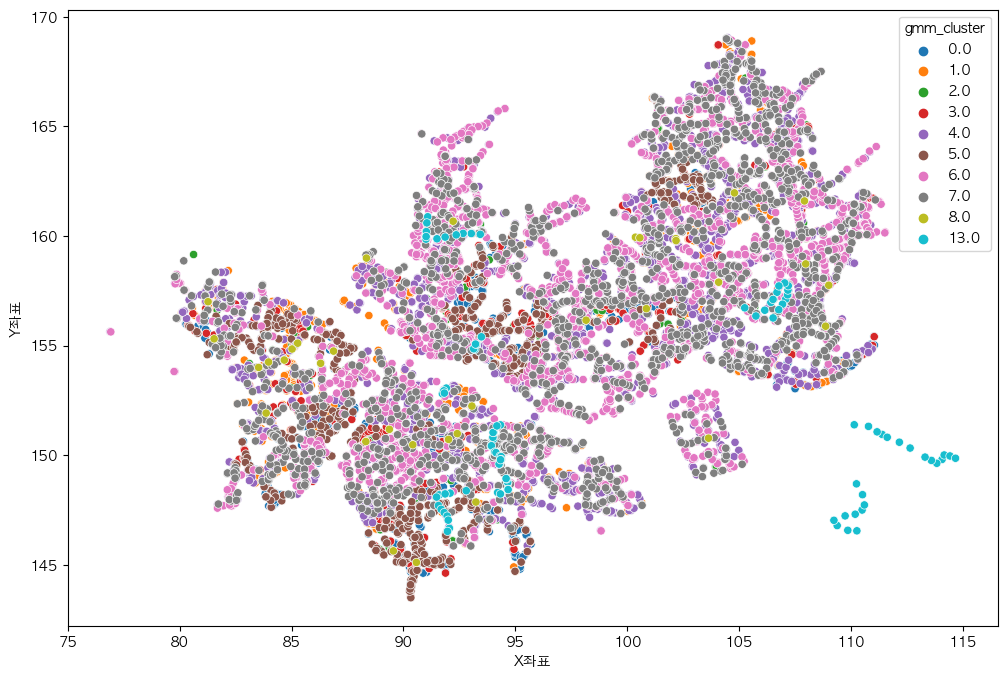

In [239]:
좌표 = final_tb_infra_population[['X좌표', 'Y좌표','NODE_ID',"정류소명"]]
total = pd.concat([bus_passenger_on,좌표],axis=1)

 # 좌표 스케일링을 위한 형식 변환
total["X좌표"]=total["X좌표"].astype("float64")
total["Y좌표"]=total["Y좌표"].astype("float64")
    
total["X좌표"]=(total["X좌표"]-126)*100
total["Y좌표"]=(total["Y좌표"]-36)*100

total.loc[total["NODE_ID"].isin(NODE_ID_list),"gmm_cluster"]=11+2

# 클래스를 기준으로 정렬
total_off_다람쥐 = total.sort_values(by="gmm_cluster")

# 좌표를 바탕으로 군집 시각화
import seaborn as sns

plt.figure(figsize=(12,8))

sns.scatterplot(x="X좌표",y="Y좌표",hue="gmm_cluster",data=total_off_다람쥐, palette='tab10')

plt.rcParams['font.family'] = 'AppleGothic'

plt.show()